In [2]:
import practicalSPARQL
import pandas as pd
import ast
import matplotlib.pyplot as plt

In [3]:
root_q = 'queries'
root_d = 'results'

# read login data
login = pd.read_json('config_sparql.json')
ENDPOINT = login['endpoint'][0]
USERNAME = login['username'][0]
PASSWORD = login['password'][0]

# create sparql object
sparql = practicalSPARQL.practicalWrapper(ENDPOINT)
sparql.setCredentials(USERNAME, PASSWORD)

print("--- Querying ENDPOINT: {} ---".format(ENDPOINT))

--- Querying ENDPOINT: http://devmeta.sphaera.mpiwg-berlin.mpg.de/sparql ---


In [4]:
q = practicalSPARQL.stringify_SPARQL('books_query.sparql')    # select data from the ttl file as a dataframe
books = sparql.select_as_dataframe(q)

In [5]:
q = practicalSPARQL.stringify_SPARQL('elements_query_050824.sparql')    # select data from the ttl file as a dataframe
df = sparql.select_as_dataframe(q)

In [6]:
df['cks'] = df['cks'].astype(str)
df['cks'] = df['cks'].str.split(', ')
df_exploded = df.explode('cks')

# Remove brackets, single quotes, double quotes, and leading/trailing whitespace
df_exploded['cks'] = df_exploded['cks'].str.replace(r"[\[\]\"']", "", regex=True).str.strip()

df_exploded.reset_index(drop=True, inplace=True)

In [7]:
# Count unique values in the specified column
unique_count = df_exploded['images'].nunique()

print(f"Number of unique values in 'images': {unique_count}")

Number of unique values in 'images': 20540


In [8]:
# Define the target cks values with quotes
target_cks = [
    'CK_Seven Climate Zones'
]

# Filter the DataFrame for matching cks values
filtered_df = df_exploded[df_exploded['cks'].isin(target_cks)]
filtered_df

images   cluster_name  \
6      http://db.sphaera.mpiwg-berlin.mpg.de/containe...  SAC_SIL_00009   
59     http://db.sphaera.mpiwg-berlin.mpg.de/containe...  SAC_SIL_01357   
112    http://db.sphaera.mpiwg-berlin.mpg.de/containe...  SAC_SIL_01001   
163    http://db.sphaera.mpiwg-berlin.mpg.de/containe...  SAC_SIL_03669   
253    http://db.sphaera.mpiwg-berlin.mpg.de/containe...  SAC_SIL_00660   
...                                                  ...            ...   
27351  http://dev.sphaera.mpiwg-berlin.mpg.de/contain...  SAC_SIL_01322   
27449  http://dev.sphaera.mpiwg-berlin.mpg.de/contain...  SAC_SIL_01514   
27558  http://dev.sphaera.mpiwg-berlin.mpg.de/contain...  SAC_SIL_02783   
27849  http://dev.sphaera.mpiwg-berlin.mpg.de/contain...  SAC_SIL_01514   
27923  http://dev.sphaera.mpiwg-berlin.mpg.de/contain...  SAC_SIL_01559   

                          cks  \
6      CK_Seven Climate Zones   
59     CK_Seven Climate Zones   
112    CK_Seven Climate Zones   
163    CK_Seven Climate Zones   
253    CK_Seven Climate Zones   
...                       ...   
27351  CK_Seven Climate Zones   
27449  CK_Seven Climate Zones   
27558  CK_Seven Climate Zones   
27849  CK_Seven Climate Zones   
27923  CK_Seven Climate Zones   

                                                    book   bid  \
6      http://sphaera.mpiwg-berlin.mpg.de/id/item/016...  2201   
59     http://sphaera.mpiwg-berlin.mpg.de/id/item/0a7...  1624   
112    http://sphaera.mpiwg-berlin.mpg.de/id/item/3ba...  1632   
163    http://sphaera.mpiwg-berlin.mpg.de/id/item/5cc...  1928   
253    http://sphaera.mpiwg-berlin.mpg.de/id/item/744...  1923   
...                                                  ...   ...   
27351  http://sphaera.mpiwg-berlin.mpg.de/id/item/9b2...  1799   
27449  http://sphaera.mpiwg-berlin.mpg.de/id/item/b09...  1959   
27558  http://sphaera.mpiwg-berlin.mpg.de/id/item/514...  1921   
27849  http://sphaera.mpiwg-berlin.mpg.de/id/item/cb8...  1872   
27923  http://sphaera.mpiwg-berlin.mpg.de/id/item/890...  2247   

                                        part_or_adaption  \
6      http://sphaera.mpiwg-berlin.mpg.de/id/part/c61...   
59     http://sphaera.mpiwg-berlin.mpg.de/id/adaption...   
112    http://sphaera.mpiwg-berlin.mpg.de/id/part/c61...   
163    http://sphaera.mpiwg-berlin.mpg.de/id/part/c61...   
253    http://sphaera.mpiwg-berlin.mpg.de/id/part/c61...   
...                                                  ...   
27351  http://sphaera.mpiwg-berlin.mpg.de/id/adaption...   
27449  http://sphaera.mpiwg-berlin.mpg.de/id/adaption...   
27558  http://sphaera.mpiwg-berlin.mpg.de/id/adaption...   
27849  http://sphaera.mpiwg-berlin.mpg.de/id/adaption...   
27923  http://sphaera.mpiwg-berlin.mpg.de/id/part/ff4...   

                                  part_or_adaption_label  \
6                                   Tractatus de sphaera   
59                                  Tractatus de sphaera   
112                                 Tractatus de sphaera   
163                                 Tractatus de sphaera   
253                                 Tractatus de sphaera   
...                                                  ...   
27351            Burgersdijck's commentary on the Sphere   
27449  Albertus Hero's Scholia combined with Vinet's ...   
27558                 Pifferi's Commentary on the Sphere   
27849  Vinet 1584 - Commentary on Treatise on the Sph...   
27923                       Sphere and art of navigation   

                            type_label custom_identifier    place  year flag  
6               Original Part, Content               100  Leipzig  1489  nan  
59                  Content, Annotated               231    Paris  1494       
112             Content, Original Part               100  Leipzig  1498  nan  
163             Original Part, Content               100   Venice  1485  nan  
253             Original Part, Content               100   Venice  1482  nan  
...                                ...     

In [9]:
# Count unique values in the specified column
unique_count = filtered_df['images'].nunique()

print(f"Number of unique values in 'images': {unique_count}")

Number of unique values in 'images': 272


In [10]:
# Count unique images associated with each cks value
unique_images_per_cks = filtered_df.groupby('cks')['images'].nunique()

# Print the results
print('Number of unique images associated with each cks value:')
print(unique_images_per_cks)

Number of unique images associated with each cks value:
cks
CK_Seven Climate Zones    272
Name: images, dtype: int64


C:\Users\nogas\AppData\Local\Temp\ipykernel_25608\3864217832.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['year'] = filtered_df['year'].astype(int)
C:\Users\nogas\AppData\Local\Temp\ipykernel_25608\3864217832.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['interval'] = pd.cut(filtered_df['year'], bins=bins, labels=labels, right=False)
C:\Users\nogas\AppData\Local\Temp\ipykernel_25608\3864217832.py:19: FutureWarning: The default of observed=False is deprecated and will be

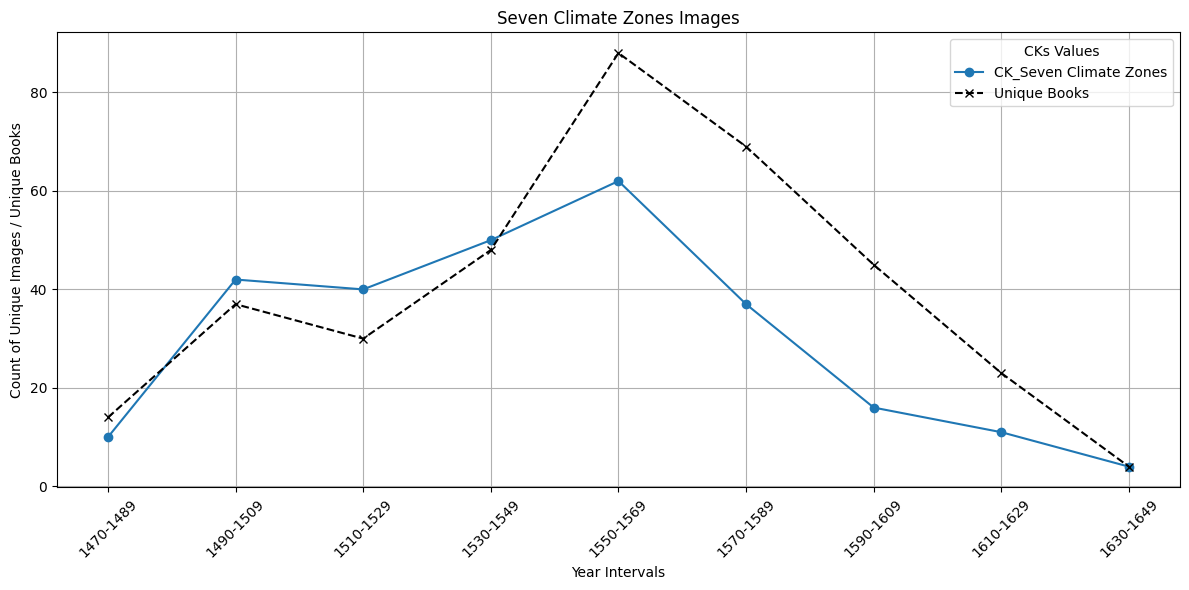

In [11]:
# Ensure the year columns are of integer type
filtered_df['year'] = filtered_df['year'].astype(int)
books['year'] = books['year'].astype(int)

# Define bins and labels for year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = [
    '1470-1489', '1490-1509', '1510-1529', '1530-1549',
    '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649'
]

# Add interval column to the filtered_df DataFrame
filtered_df['interval'] = pd.cut(filtered_df['year'], bins=bins, labels=labels, right=False)

# Add interval column to the books DataFrame
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Count unique images in each interval for each unique cks value
unique_images_count = (filtered_df.groupby(['interval', 'cks'])['images']
                       .nunique().unstack(fill_value=0))

# Count unique books in each interval
unique_books_count = books.groupby('interval')['book'].nunique()  # Assuming 'title' is the column with book names

# Create the plot
plt.figure(figsize=(12, 6))

# Plotting unique images for each cks value
for cks_value in unique_images_count.columns:
    plt.plot(unique_images_count.index, unique_images_count[cks_value], marker='o', label=cks_value)

# Plot unique books counts as a line
plt.plot(unique_books_count.index, unique_books_count.values, marker='x', color='black', linestyle='--', label='Unique Books')

# Customize the plot
plt.title('Seven Climate Zones Images')
plt.xlabel('Year Intervals')
plt.ylabel('Count of Unique Images / Unique Books')
plt.xticks(rotation=45)
plt.legend(title='CKs Values')
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()

C:\Users\nogas\AppData\Local\Temp\ipykernel_25608\3849230900.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['year'] = filtered_df['year'].astype(int)
C:\Users\nogas\AppData\Local\Temp\ipykernel_25608\3849230900.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['interval'] = pd.cut(filtered_df['year'], bins=bins, labels=labels, right=False)
C:\Users\nogas\AppData\Local\Temp\ipykernel_25608\3849230900.py:19: FutureWarning: The default of observed=False is deprecated and will be

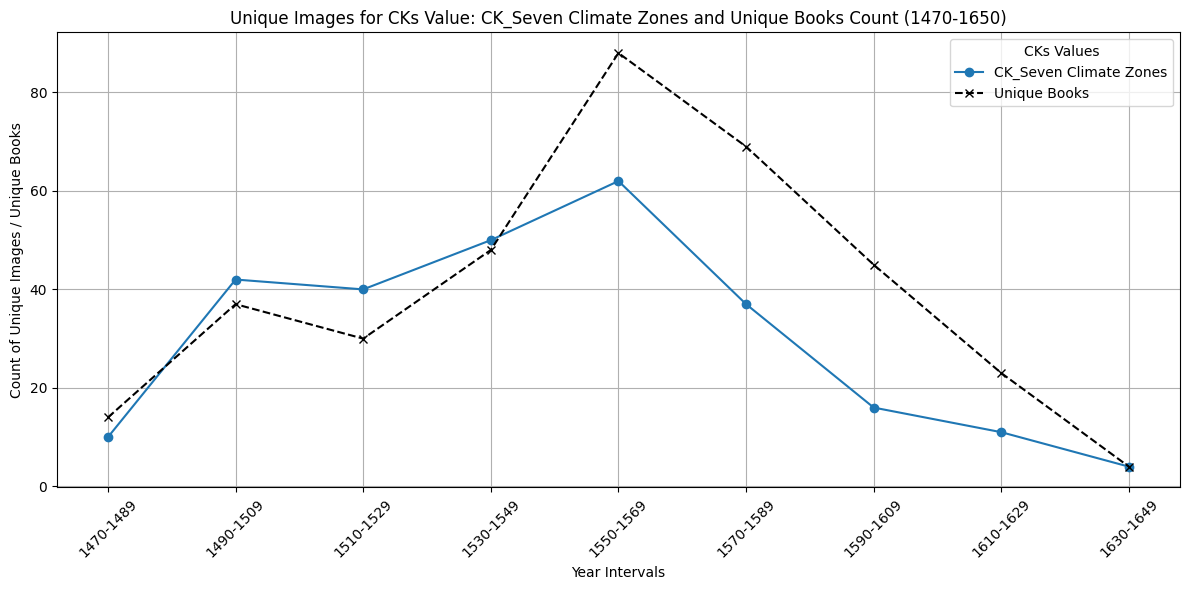

In [12]:
# Ensure the year columns are of integer type
filtered_df['year'] = filtered_df['year'].astype(int)
books['year'] = books['year'].astype(int)

# Define bins and labels for year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = [
    '1470-1489', '1490-1509', '1510-1529', '1530-1549',
    '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649'
]

# Add interval column to the filtered_df DataFrame
filtered_df['interval'] = pd.cut(filtered_df['year'], bins=bins, labels=labels, right=False)

# Add interval column to the books DataFrame
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Count unique images in each interval for each unique cks value
unique_images_count = (filtered_df.groupby(['interval', 'cks'])['images']
                       .nunique().unstack(fill_value=0))

# Count unique books in each interval
unique_books_count = books.groupby('interval')['book'].nunique()  # Assuming 'book' is the column with book names

# Loop through each unique cks value and create a separate plot
for cks_value in unique_images_count.columns:
    plt.figure(figsize=(12, 6))
    
    # Plotting unique images for the current cks value
    plt.plot(unique_images_count.index, unique_images_count[cks_value], marker='o', label=cks_value)

    # Plot unique books counts as a line
    plt.plot(unique_books_count.index, unique_books_count.values, marker='x', color='black', linestyle='--', label='Unique Books')

    # Customize the plot
    plt.title(f'Unique Images for CKs Value: {cks_value} and Unique Books Count (1470-1650)')
    plt.xlabel('Year Intervals')
    plt.ylabel('Count of Unique Images / Unique Books')
    plt.xticks(rotation=45)
    plt.legend(title='CKs Values')
    plt.grid()

    # Show the plot
    plt.tight_layout()
    plt.show()

In [13]:
#output cluster names from filtered_df and create an excel file for visual tagging

# Get unique cluster_name values
#unique_cluster_names = filtered_df['cluster_name'].unique()

# Create a DataFrame from the unique values
#unique_cluster_names_df = pd.DataFrame(unique_cluster_names, columns=['cluster_name'])

# Define the output Excel file name
#output_file = 'seven_climate_zones.xlsx'

# Write the DataFrame to an Excel file
#unique_cluster_names_df.to_excel(output_file, index=False)

In [14]:
#combine with visual data

# Path to the Excel file
excel_file_path = 'C:\\Users\\nogas\\Image_data\\seven_climate_zones.xlsx'

# Load the Excel file into a DataFrame
excel_data = pd.read_excel(excel_file_path)

seven_climate_zones_visual = pd.merge(filtered_df, excel_data, on='cluster_name', how='left')

seven_climate_zones_visual

images   cluster_name  \
0    http://db.sphaera.mpiwg-berlin.mpg.de/containe...  SAC_SIL_00009   
1    http://db.sphaera.mpiwg-berlin.mpg.de/containe...  SAC_SIL_01357   
2    http://db.sphaera.mpiwg-berlin.mpg.de/containe...  SAC_SIL_01001   
3    http://db.sphaera.mpiwg-berlin.mpg.de/containe...  SAC_SIL_03669   
4    http://db.sphaera.mpiwg-berlin.mpg.de/containe...  SAC_SIL_00660   
..                                                 ...            ...   
272  http://dev.sphaera.mpiwg-berlin.mpg.de/contain...  SAC_SIL_01322   
273  http://dev.sphaera.mpiwg-berlin.mpg.de/contain...  SAC_SIL_01514   
274  http://dev.sphaera.mpiwg-berlin.mpg.de/contain...  SAC_SIL_02783   
275  http://dev.sphaera.mpiwg-berlin.mpg.de/contain...  SAC_SIL_01514   
276  http://dev.sphaera.mpiwg-berlin.mpg.de/contain...  SAC_SIL_01559   

                        cks  \
0    CK_Seven Climate Zones   
1    CK_Seven Climate Zones   
2    CK_Seven Climate Zones   
3    CK_Seven Climate Zones   
4    CK_Seven Climate Zones   
..                      ...   
272  CK_Seven Climate Zones   
273  CK_Seven Climate Zones   
274  CK_Seven Climate Zones   
275  CK_Seven Climate Zones   
276  CK_Seven Climate Zones   

                                                  book   bid  \
0    http://sphaera.mpiwg-berlin.mpg.de/id/item/016...  2201   
1    http://sphaera.mpiwg-berlin.mpg.de/id/item/0a7...  1624   
2    http://sphaera.mpiwg-berlin.mpg.de/id/item/3ba...  1632   
3    http://sphaera.mpiwg-berlin.mpg.de/id/item/5cc...  1928   
4    http://sphaera.mpiwg-berlin.mpg.de/id/item/744...  1923   
..                                                 ...   ...   
272  http://sphaera.mpiwg-berlin.mpg.de/id/item/9b2...  1799   
273  http://sphaera.mpiwg-berlin.mpg.de/id/item/b09...  1959   
274  http://sphaera.mpiwg-berlin.mpg.de/id/item/514...  1921   
275  http://sphaera.mpiwg-berlin.mpg.de/id/item/cb8...  1872   
276  http://sphaera.mpiwg-berlin.mpg.de/id/item/890...  2247   

                                      part_or_adaption  \
0    http://sphaera.mpiwg-berlin.mpg.de/id/part/c61...   
1    http://sphaera.mpiwg-berlin.mpg.de/id/adaption...   
2    http://sphaera.mpiwg-berlin.mpg.de/id/part/c61...   
3    http://sphaera.mpiwg-berlin.mpg.de/id/part/c61...   
4    http://sphaera.mpiwg-berlin.mpg.de/id/part/c61...   
..                                                 ...   
272  http://sphaera.mpiwg-berlin.mpg.de/id/adaption...   
273  http://sphaera.mpiwg-berlin.mpg.de/id/adaption...   
274  http://sphaera.mpiwg-berlin.mpg.de/id/adaption...   
275  http://sphaera.mpiwg-berlin.mpg.de/id/adaption...   
276  http://sphaera.mpiwg-berlin.mpg.de/id/part/ff4...   

                                part_or_adaption_label  \
0                                 Tractatus de sphaera   
1                                 Tractatus de sphaera   
2                                 Tractatus de sphaera   
3                                 Tractatus de sphaera   
4                                 Tractatus de sphaera   
..                                                 ...   
272            Burgersdijck's commentary on the Sphere   
273  Albertus Hero's Scholia combined with Vinet's ...   
274                 Pifferi's Commentary on the Sphere   
275  Vinet 1584 - Commentary on Treatise on the Sph...   
276                       Sphere and art of navigation   

                          type_label custom_identifier    place  ...  \
0             Original Part, Content               100  Leipzig  ...   
1                 Content, Annotated               231    Paris  ...   
2             Content, Original Part               100  Leipzig  ...   
3             Original Part, Content               100   Venice  ...   
4             Original Part, Content               100   Venice  ...   
..                               ...               ...      ...  ...   
272               Content, Annotated               266   Leiden  ...   
273               Annotated, Content               273  Col

In [15]:
#visual graphs

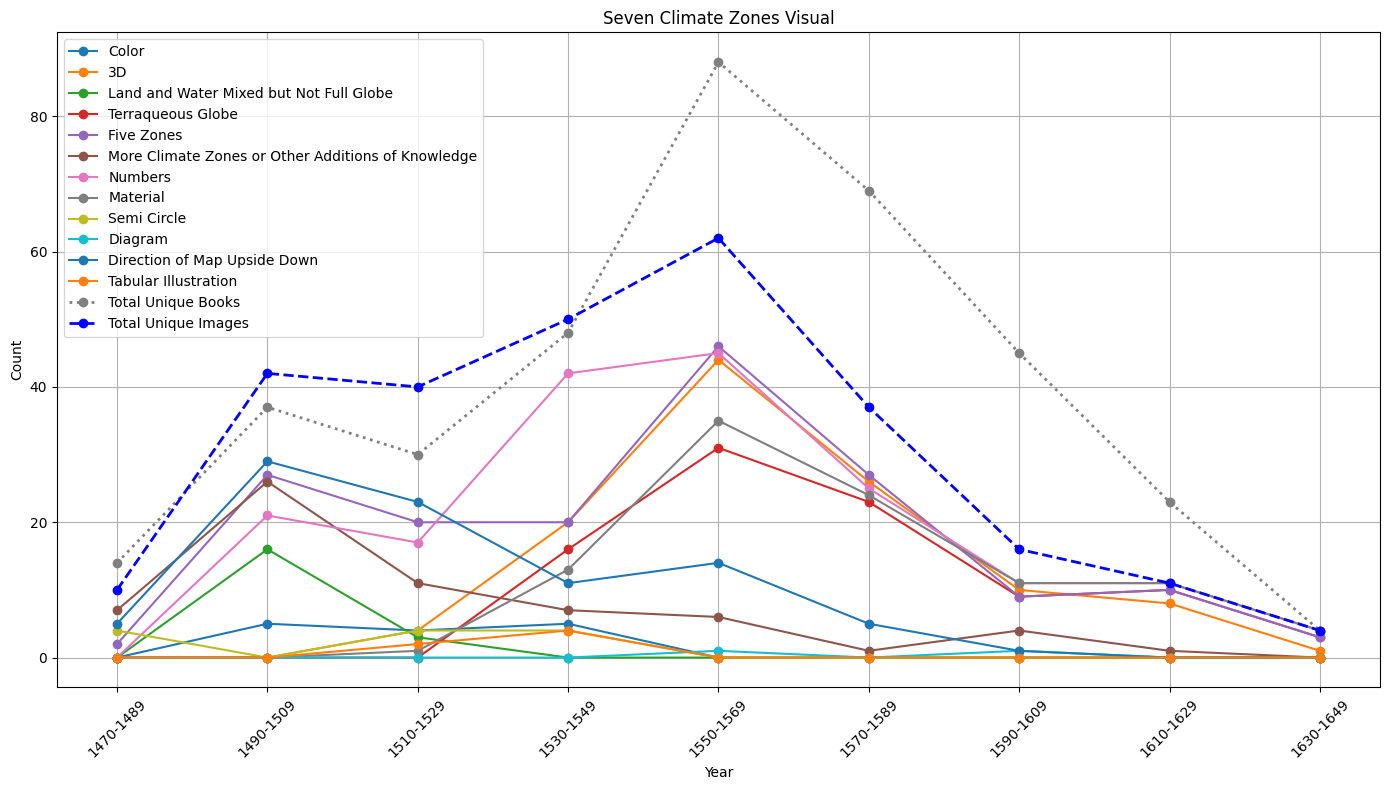

In [16]:
# Convert 'year' to int
seven_climate_zones_visual['year'] = seven_climate_zones_visual['year'].astype(int)
books['year'] = books['year'].astype(int)

# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals
seven_climate_zones_visual['interval'] = pd.cut(seven_climate_zones_visual['year'], bins=bins, labels=labels, right=False)
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Function to count unique images by column
def count_unique_images_by_column(column_name, value):
    filtered_df = seven_climate_zones_visual[seven_climate_zones_visual[column_name] == value]
    return filtered_df.groupby('interval', observed=False)['images'].nunique().reindex(labels, fill_value=0)

# Collect data with updated column names
color = count_unique_images_by_column('color', 'yes')
three_dimensions_effect = count_unique_images_by_column('3D', 'yes')
land_water_mixed = count_unique_images_by_column('land and water mixed but not full globe', 'yes')
terraqueous_globe = count_unique_images_by_column('terraqueous globe', 'yes')
five_zones = count_unique_images_by_column('five zones', 'yes')
climate_zones_additions = count_unique_images_by_column('more climate zones or other additions of knowledge', 'yes')
numbers = count_unique_images_by_column('numbers', 'yes')
material = count_unique_images_by_column('material', 'yes')
semi_circle = count_unique_images_by_column('semi circle', 'yes')
diagram = count_unique_images_by_column('diagram', 'yes')
direction_map_upside_down = count_unique_images_by_column('direction of map up side down', 'yes')
tabular_illustration = count_unique_images_by_column('tabular illustration', 'yes')

# Combine the data for lines
side_by_side_data = pd.DataFrame({
    'Color': color,
    '3D': three_dimensions_effect,
    'Land and Water Mixed but Not Full Globe': land_water_mixed,
    'Terraqueous Globe': terraqueous_globe,
    'Five Zones': five_zones,
    'More Climate Zones or Other Additions of Knowledge': climate_zones_additions,
    'Numbers': numbers,
    'Material': material,
    'Semi Circle': semi_circle,
    'Diagram': diagram,
    'Direction of Map Upside Down': direction_map_upside_down,
    'Tabular Illustration': tabular_illustration,
})

# Calculate total unique books and images for each interval
total_unique_books_df = books.groupby('interval', observed=False)['book'].nunique().reindex(labels, fill_value=0)
total_unique_images_df = seven_climate_zones_visual.groupby('interval', observed=False)['images'].nunique().reindex(labels, fill_value=0)

# Plot lines with single y-axis
fig, ax = plt.subplots(figsize=(14, 8))

# Plot lines for each category on primary y-axis
for column in side_by_side_data.columns:
    ax.plot(labels, side_by_side_data[column], marker='o', linestyle='-', label=column)

# Plot lines for total unique books
ax.plot(labels, total_unique_books_df, marker='o', linestyle=':', color='gray', label='Total Unique Books', linewidth=2)

# Plot line for total unique images
ax.plot(labels, total_unique_images_df, marker='o', linestyle='--', color='blue', label='Total Unique Images', linewidth=2)

# Formatting the plot
ax.set_xlabel('Year')
ax.set_ylabel('Count')
ax.set_title('Seven Climate Zones Visual')
ax.legend(loc='upper left')
ax.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


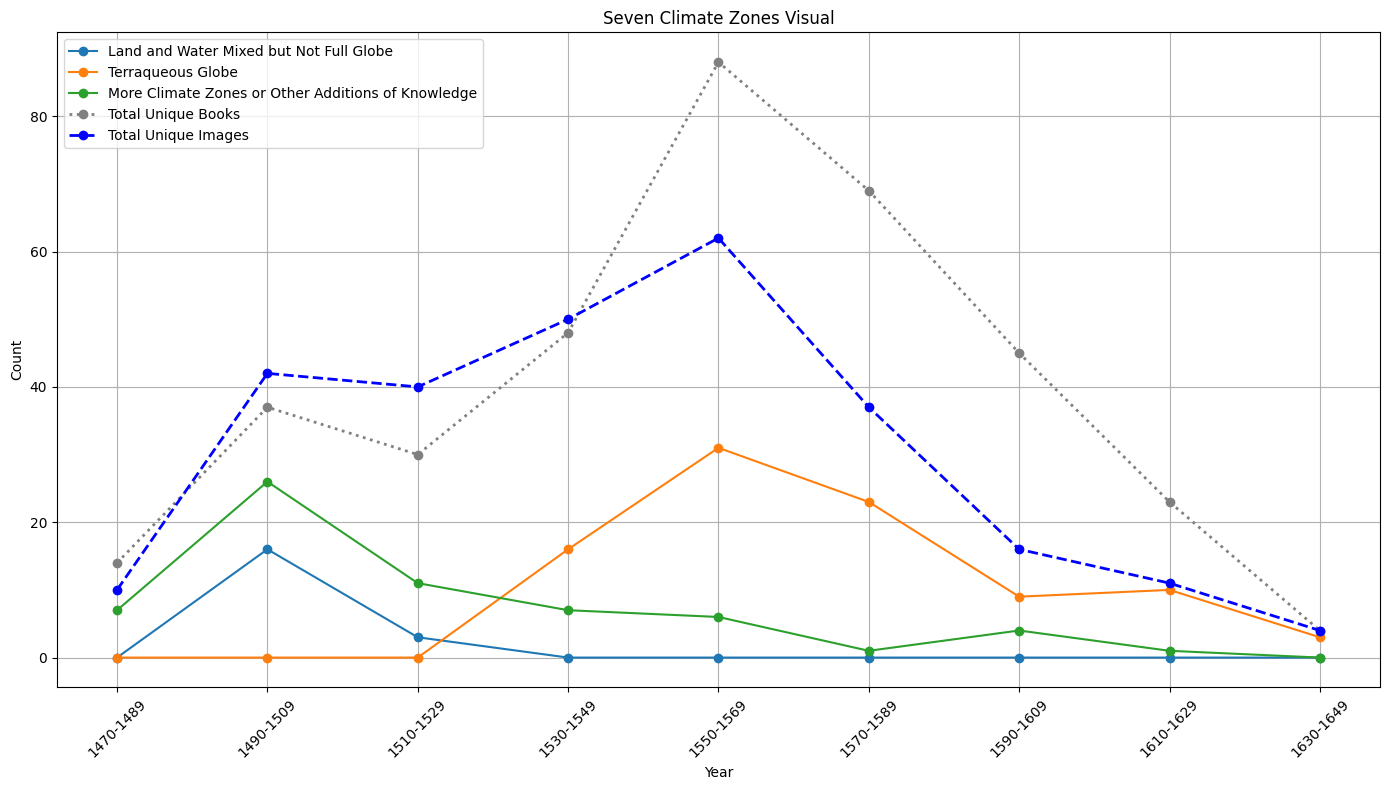

In [17]:
# Convert 'year' to int
seven_climate_zones_visual['year'] = seven_climate_zones_visual['year'].astype(int)
books['year'] = books['year'].astype(int)

# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals
seven_climate_zones_visual['interval'] = pd.cut(seven_climate_zones_visual['year'], bins=bins, labels=labels, right=False)
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Function to count unique images by column
def count_unique_images_by_column(column_name, value):
    filtered_df = seven_climate_zones_visual[seven_climate_zones_visual[column_name] == value]
    return filtered_df.groupby('interval', observed=False)['images'].nunique().reindex(labels, fill_value=0)

# Collect data with updated column names
color = count_unique_images_by_column('color', 'yes')
three_dimensions_effect = count_unique_images_by_column('3D', 'yes')
land_water_mixed = count_unique_images_by_column('land and water mixed but not full globe', 'yes')
terraqueous_globe = count_unique_images_by_column('terraqueous globe', 'yes')
five_zones = count_unique_images_by_column('five zones', 'yes')
climate_zones_additions = count_unique_images_by_column('more climate zones or other additions of knowledge', 'yes')
numbers = count_unique_images_by_column('numbers', 'yes')
material = count_unique_images_by_column('material', 'yes')
semi_circle = count_unique_images_by_column('semi circle', 'yes')
diagram = count_unique_images_by_column('diagram', 'yes')
direction_map_upside_down = count_unique_images_by_column('direction of map up side down', 'yes')
tabular_illustration = count_unique_images_by_column('tabular illustration', 'yes')

# Combine the data for lines
side_by_side_data = pd.DataFrame({
#    'Color': color,
#    '3D': three_dimensions_effect,
    'Land and Water Mixed but Not Full Globe': land_water_mixed,
    'Terraqueous Globe': terraqueous_globe,
#    'Five Zones': five_zones,
    'More Climate Zones or Other Additions of Knowledge': climate_zones_additions,
#    'Numbers': numbers,
#    'Material': material,
#    'Semi Circle': semi_circle,
#    'Diagram': diagram,
#    'Direction of Map Upside Down': direction_map_upside_down,
#    'Tabular Illustration': tabular_illustration,
})

# Calculate total unique books and images for each interval
total_unique_books_df = books.groupby('interval', observed=False)['book'].nunique().reindex(labels, fill_value=0)
total_unique_images_df = seven_climate_zones_visual.groupby('interval', observed=False)['images'].nunique().reindex(labels, fill_value=0)

# Plot lines with single y-axis
fig, ax = plt.subplots(figsize=(14, 8))

# Plot lines for each category on primary y-axis
for column in side_by_side_data.columns:
    ax.plot(labels, side_by_side_data[column], marker='o', linestyle='-', label=column)

# Plot lines for total unique books
ax.plot(labels, total_unique_books_df, marker='o', linestyle=':', color='gray', label='Total Unique Books', linewidth=2)

# Plot line for total unique images
ax.plot(labels, total_unique_images_df, marker='o', linestyle='--', color='blue', label='Total Unique Images', linewidth=2)

# Formatting the plot
ax.set_xlabel('Year')
ax.set_ylabel('Count')
ax.set_title('Seven Climate Zones Visual')
ax.legend(loc='upper left')
ax.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


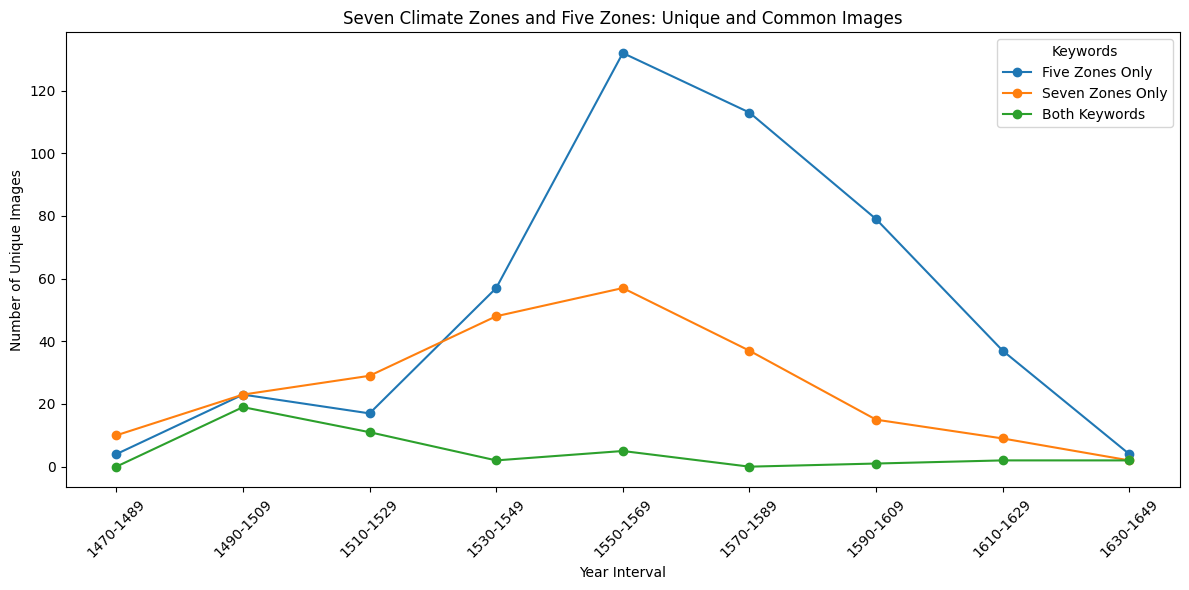

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the dataframe is named df
# Step 1: Convert year to integer
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# Step 2: Create bins for the 20-year intervals between 1470 and 1650
bins = range(1470, 1660, 20)
labels = [f"{start}-{start + 19}" for start in bins[:-1]]
df['year_group'] = pd.cut(df['year'], bins=bins, labels=labels, right=False)

# Step 3: Define filters based on cks column
# Ensure 'cks' is a string before using str.contains
df['cks'] = df['cks'].astype(str)

df['has_ck_five_zones_only'] = df['cks'].str.contains('CK_Five Zones') & ~df['cks'].str.contains('CK_Seven Climate Zones')
df['has_ck_seven_zones_only'] = df['cks'].str.contains('CK_Seven Climate Zones') & ~df['cks'].str.contains('CK_Five Zones')
df['has_both_keywords'] = df['cks'].str.contains('CK_Five Zones') & df['cks'].str.contains('CK_Seven Climate Zones')

# Step 4: Count unique images based on conditions for each interval
image_counts = pd.DataFrame({
    'Five Zones Only': df[df['has_ck_five_zones_only']].groupby('year_group', observed=False)['images'].nunique(),
    'Seven Zones Only': df[df['has_ck_seven_zones_only']].groupby('year_group', observed=False)['images'].nunique(),
    'Both Keywords': df[df['has_both_keywords']].groupby('year_group', observed=False)['images'].nunique()
})

# Step 5: Plot the results as a line graph, set the figure size here
ax = image_counts.plot(kind='line', marker='o', figsize=(12, 6))  # Set figsize directly here

# Add titles and labels
ax.set_title('Seven Climate Zones and Five Zones: Unique and Common Images')
ax.set_xlabel('Year Interval')
ax.set_ylabel('Number of Unique Images')
plt.xticks(rotation=45)
plt.legend(title="Keywords")
plt.tight_layout()
plt.show()


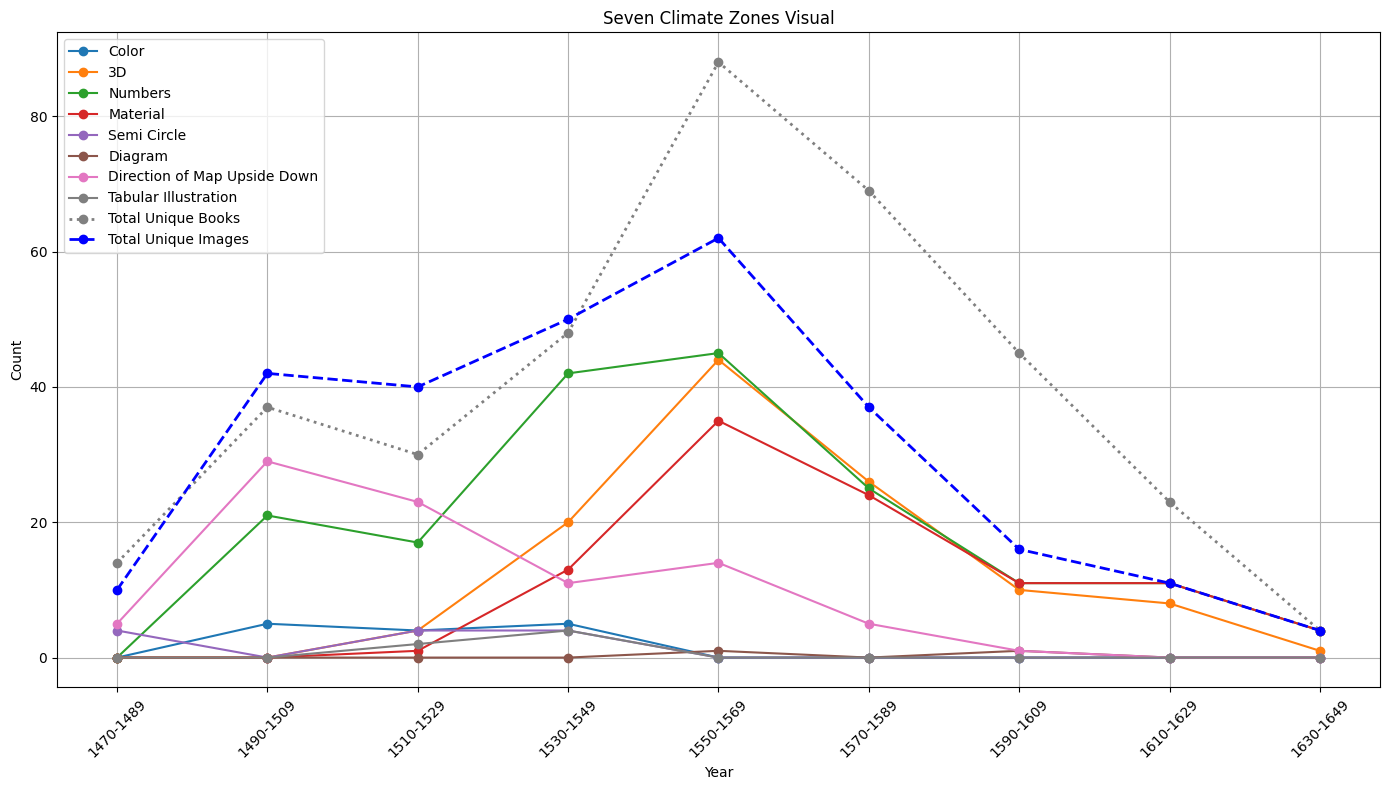

In [21]:
# Convert 'year' to int
seven_climate_zones_visual['year'] = seven_climate_zones_visual['year'].astype(int)
books['year'] = books['year'].astype(int)

# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals
seven_climate_zones_visual['interval'] = pd.cut(seven_climate_zones_visual['year'], bins=bins, labels=labels, right=False)
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Function to count unique images by column
def count_unique_images_by_column(column_name, value):
    filtered_df = seven_climate_zones_visual[seven_climate_zones_visual[column_name] == value]
    return filtered_df.groupby('interval', observed=False)['images'].nunique().reindex(labels, fill_value=0)

# Collect data with updated column names
color = count_unique_images_by_column('color', 'yes')
three_dimensions_effect = count_unique_images_by_column('3D', 'yes')
land_water_mixed = count_unique_images_by_column('land and water mixed but not full globe', 'yes')
terraqueous_globe = count_unique_images_by_column('terraqueous globe', 'yes')
five_zones = count_unique_images_by_column('five zones', 'yes')
climate_zones_additions = count_unique_images_by_column('more climate zones or other additions of knowledge', 'yes')
numbers = count_unique_images_by_column('numbers', 'yes')
material = count_unique_images_by_column('material', 'yes')
semi_circle = count_unique_images_by_column('semi circle', 'yes')
diagram = count_unique_images_by_column('diagram', 'yes')
direction_map_upside_down = count_unique_images_by_column('direction of map up side down', 'yes')
tabular_illustration = count_unique_images_by_column('tabular illustration', 'yes')

# Combine the data for lines
side_by_side_data = pd.DataFrame({
    'Color': color,
    '3D': three_dimensions_effect,
#    'Land and Water Mixed but Not Full Globe': land_water_mixed,
#    'Terraqueous Globe': terraqueous_globe,
#    'Five Zones': five_zones,
#    'More Climate Zones or Other Additions of Knowledge': climate_zones_additions,
    'Numbers': numbers,
    'Material': material,
    'Semi Circle': semi_circle,
    'Diagram': diagram,
    'Direction of Map Upside Down': direction_map_upside_down,
    'Tabular Illustration': tabular_illustration,
})

# Calculate total unique books and images for each interval
total_unique_books_df = books.groupby('interval', observed=False)['book'].nunique().reindex(labels, fill_value=0)
total_unique_images_df = seven_climate_zones_visual.groupby('interval', observed=False)['images'].nunique().reindex(labels, fill_value=0)

# Plot lines with single y-axis
fig, ax = plt.subplots(figsize=(14, 8))

# Plot lines for each category on primary y-axis
for column in side_by_side_data.columns:
    ax.plot(labels, side_by_side_data[column], marker='o', linestyle='-', label=column)

# Plot lines for total unique books
ax.plot(labels, total_unique_books_df, marker='o', linestyle=':', color='gray', label='Total Unique Books', linewidth=2)

# Plot line for total unique images
ax.plot(labels, total_unique_images_df, marker='o', linestyle='--', color='blue', label='Total Unique Images', linewidth=2)

# Formatting the plot
ax.set_xlabel('Year')
ax.set_ylabel('Count')
ax.set_title('Seven Climate Zones Visual')
ax.legend(loc='upper left')
ax.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


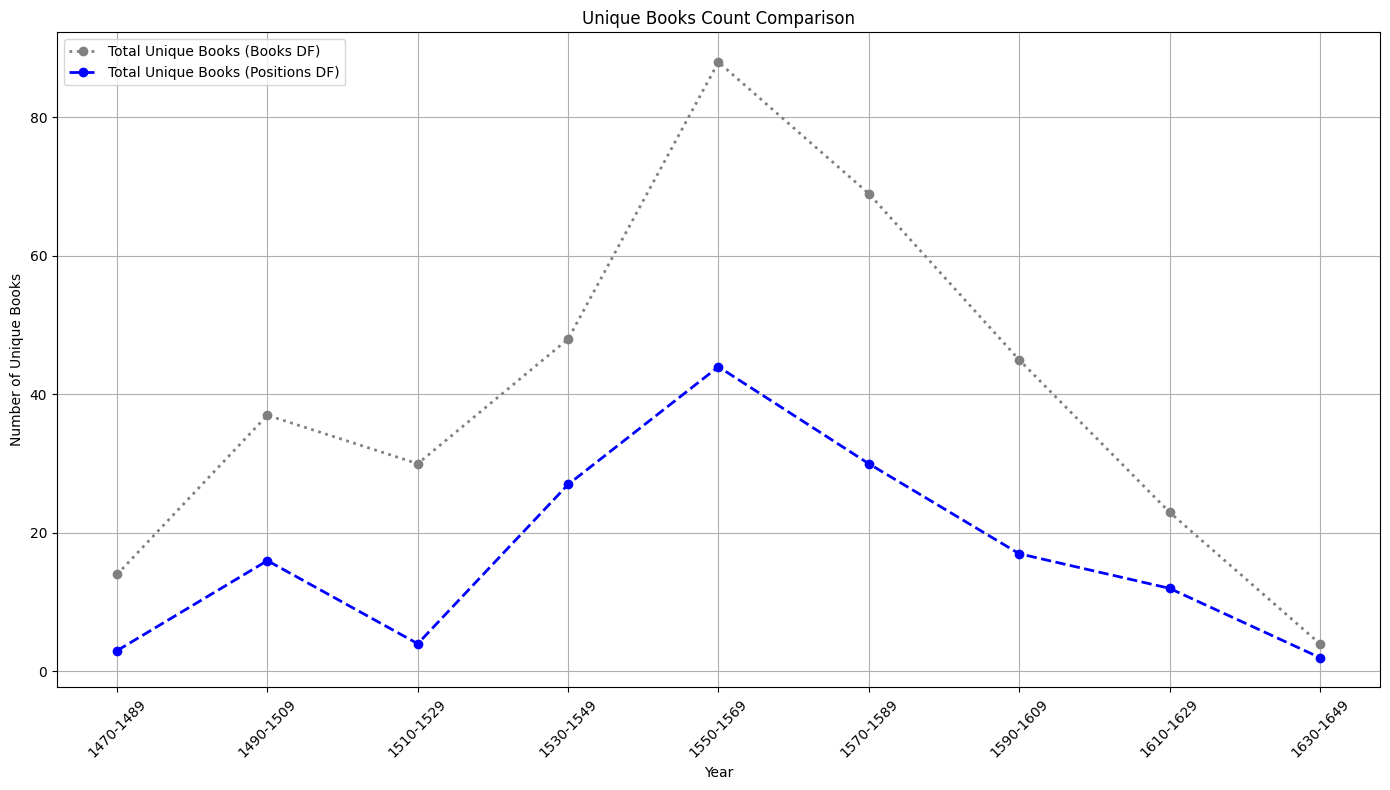

In [46]:
# Convert 'year' to int
df_positions_of_zenith.loc[:, 'year'] = df_positions_of_zenith['year'].astype(int)

# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals
df_positions_of_zenith.loc[:, 'interval'] = pd.cut(df_positions_of_zenith['year'], bins=bins, labels=labels, right=False)
books.loc[:, 'interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Calculate total unique books for each interval from books DataFrame
total_unique_books_df = books.groupby('interval', observed=False)['book'].nunique().reindex(labels, fill_value=0)

# Calculate total unique books for each interval from df_positions_of_zenith
total_unique_books_positions_df = df_positions_of_zenith.groupby('interval', observed=False)['book'].nunique().reindex(labels, fill_value=0)

# Plot lines for the two unique book counts
fig, ax = plt.subplots(figsize=(14, 8))

# Plot lines for total unique books from books DataFrame
ax.plot(labels, total_unique_books_df, marker='o', linestyle=':', color='gray', label='Total Unique Books (Books DF)', linewidth=2)

# Plot lines for total unique books from df_positions_of_zenith
ax.plot(labels, total_unique_books_positions_df, marker='o', linestyle='--', color='blue', label='Total Unique Books (Positions DF)', linewidth=2)

# Formatting the plot
ax.set_xlabel('Year')
ax.set_ylabel('Number of Unique Books')
ax.set_title('Unique Books Count Comparison')
ax.legend(loc='upper left')
ax.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


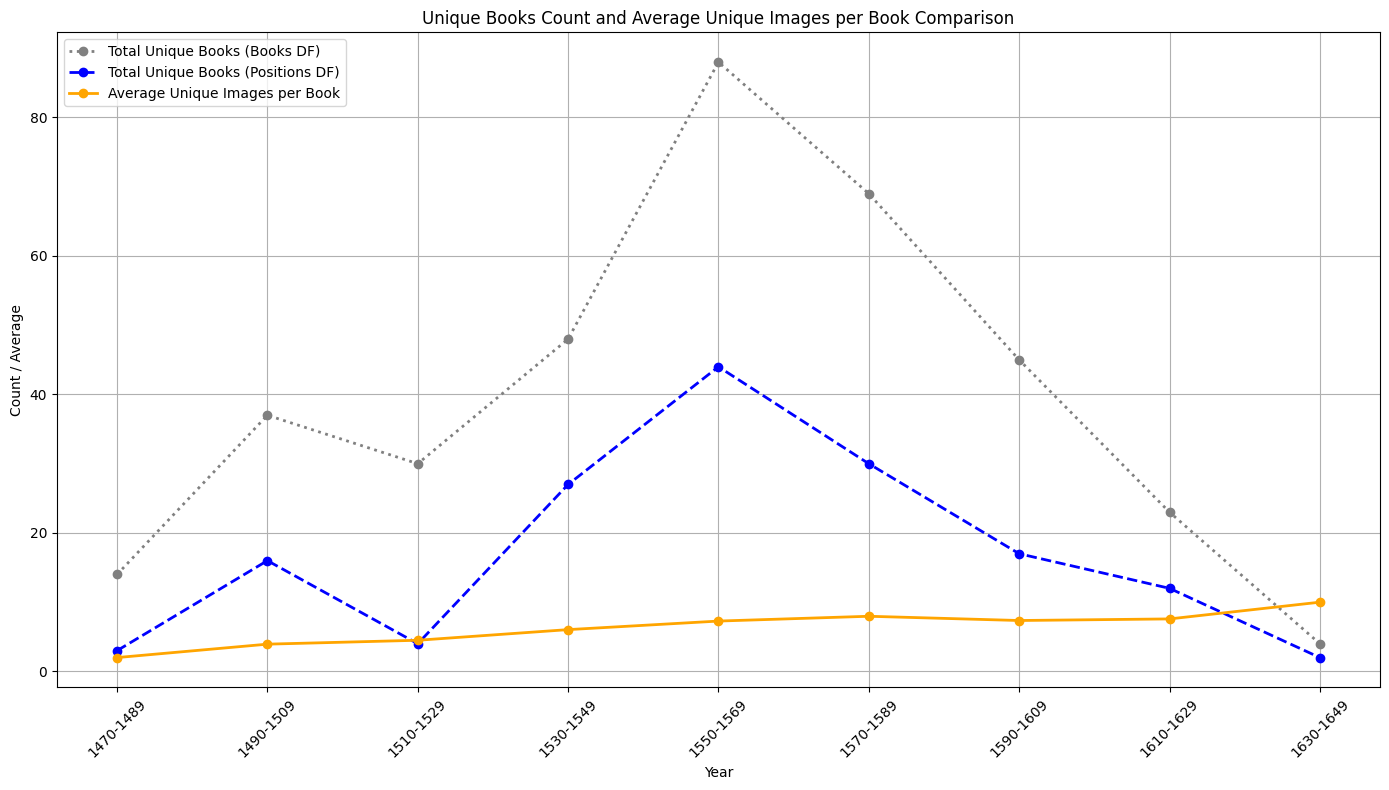

In [49]:
import numpy as np

# Convert 'year' to int
df_positions_of_zenith.loc[:, 'year'] = df_positions_of_zenith['year'].astype(int)

# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals
df_positions_of_zenith.loc[:, 'interval'] = pd.cut(df_positions_of_zenith['year'], bins=bins, labels=labels, right=False)
books.loc[:, 'interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Calculate total unique books for each interval from books DataFrame
total_unique_books_df = books.groupby('interval', observed=False)['book'].nunique().reindex(labels, fill_value=0)

# Calculate total unique books for each interval from df_positions_of_zenith
total_unique_books_positions_df = df_positions_of_zenith.groupby('interval', observed=False)['book'].nunique().reindex(labels, fill_value=0)

# Calculate total unique images for each interval in df_positions_of_zenith
total_unique_images_per_interval = df_positions_of_zenith.groupby('interval', observed=False)['images'].nunique().reindex(labels, fill_value=0)

# Calculate average unique images per book for each interval
average_images_per_book = total_unique_images_per_interval / total_unique_books_positions_df.replace(0, np.nan)  # Avoid division by zero

# Plot lines for the two unique book counts and the average images per book
fig, ax = plt.subplots(figsize=(14, 8))

# Plot lines for total unique books from books DataFrame
ax.plot(labels, total_unique_books_df, marker='o', linestyle=':', color='gray', label='Total Unique Books (Books DF)', linewidth=2)

# Plot lines for total unique books from df_positions_of_zenith
ax.plot(labels, total_unique_books_positions_df, marker='o', linestyle='--', color='blue', label='Total Unique Books (Positions DF)', linewidth=2)

# Plot line for average unique images per book
ax.plot(labels, average_images_per_book, marker='o', linestyle='-', color='orange', label='Average Unique Images per Book', linewidth=2)

# Formatting the plot
ax.set_xlabel('Year')
ax.set_ylabel('Count / Average')
ax.set_title('Unique Books Count and Average Unique Images per Book Comparison')
ax.legend(loc='upper left')
ax.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


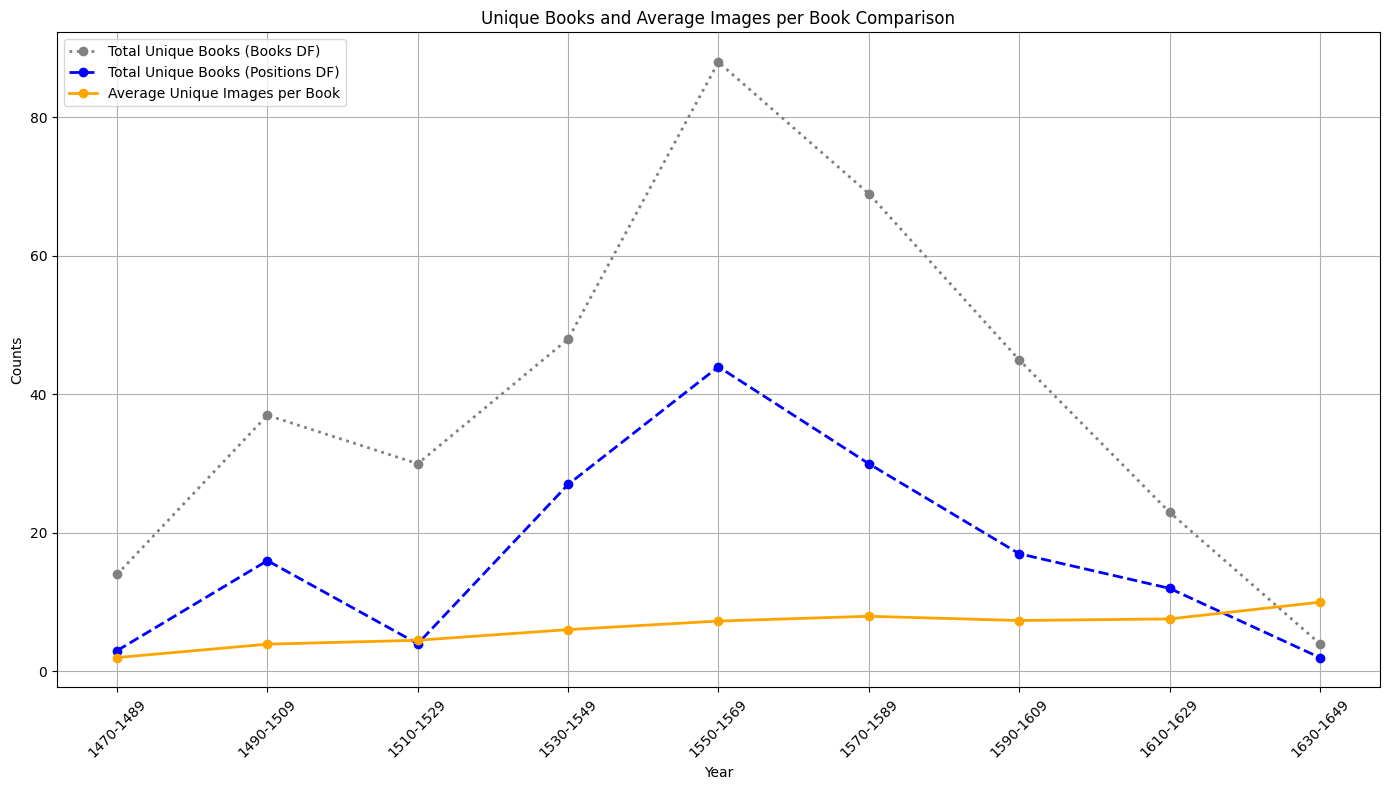

In [50]:
# Convert 'year' to int
df_positions_of_zenith.loc[:, 'year'] = df_positions_of_zenith['year'].astype(int)

# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals
df_positions_of_zenith.loc[:, 'interval'] = pd.cut(df_positions_of_zenith['year'], bins=bins, labels=labels, right=False)
books.loc[:, 'interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Calculate total unique books for each interval from books DataFrame
total_unique_books_df = books.groupby('interval', observed=False)['book'].nunique().reindex(labels, fill_value=0)

# Calculate total unique books for each interval from df_positions_of_zenith
total_unique_books_positions_df = df_positions_of_zenith.groupby('interval', observed=False)['book'].nunique().reindex(labels, fill_value=0)

# Calculate total unique images for each interval in df_positions_of_zenith
total_unique_images_per_interval = df_positions_of_zenith.groupby('interval', observed=False)['images'].nunique().reindex(labels, fill_value=0)

# Calculate average unique images per book for each interval
average_images_per_book = total_unique_images_per_interval / total_unique_books_positions_df.replace(0, np.nan)  # Avoid division by zero

# Plot lines for the two unique book counts and the average
fig, ax = plt.subplots(figsize=(14, 8))

# Plot lines for total unique books from books DataFrame
ax.plot(labels, total_unique_books_df, marker='o', linestyle=':', color='gray', label='Total Unique Books (Books DF)', linewidth=2)

# Plot lines for total unique books from df_positions_of_zenith
ax.plot(labels, total_unique_books_positions_df, marker='o', linestyle='--', color='blue', label='Total Unique Books (Positions DF)', linewidth=2)

# Plot line for average unique images per book
ax.plot(labels, average_images_per_book, marker='o', linestyle='-', color='orange', label='Average Unique Images per Book', linewidth=2)

# Formatting the plot
ax.set_xlabel('Year')
ax.set_ylabel('Counts')
ax.set_title('Unique Books and Average Images per Book Comparison')
ax.legend(loc='upper left')
ax.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


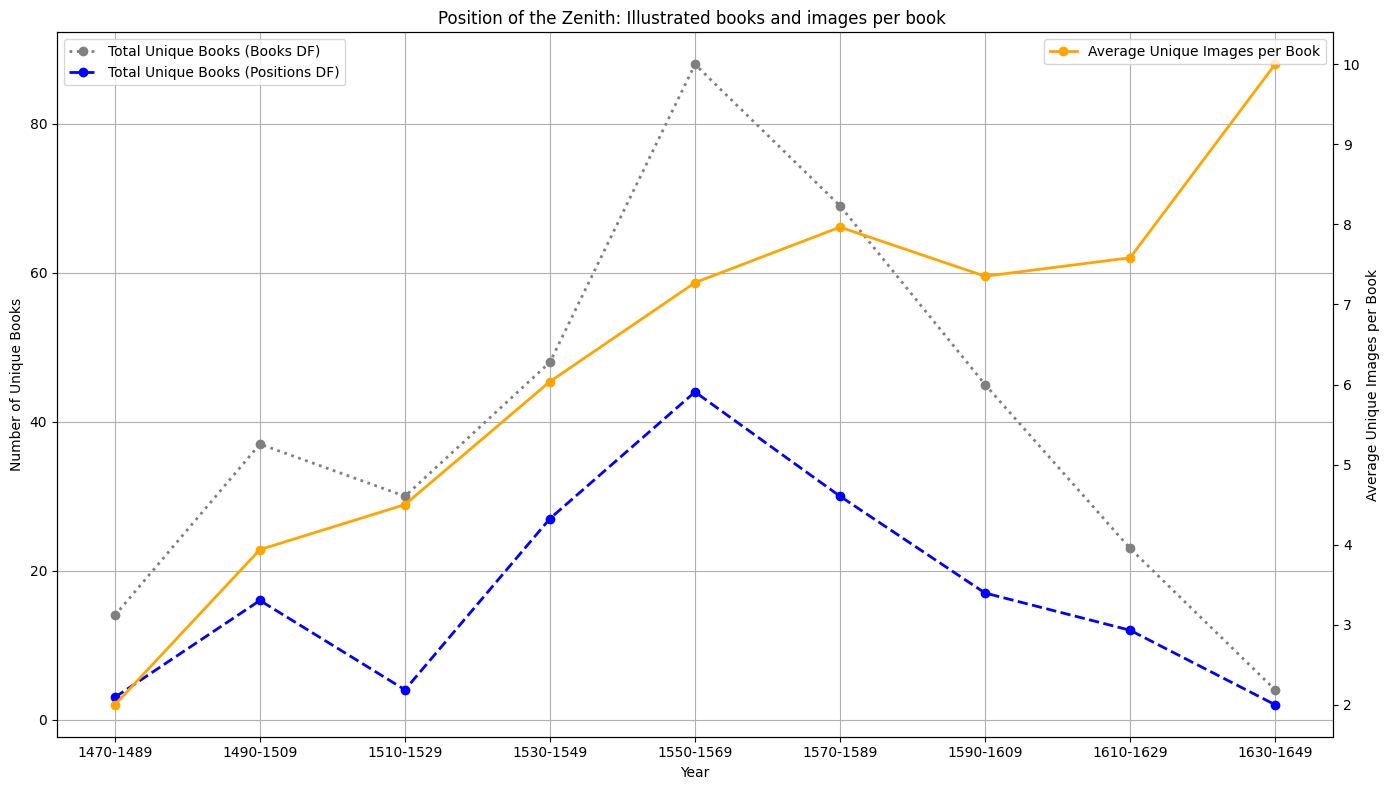

In [52]:
# Convert 'year' to int
df_positions_of_zenith.loc[:, 'year'] = df_positions_of_zenith['year'].astype(int)

# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals
df_positions_of_zenith.loc[:, 'interval'] = pd.cut(df_positions_of_zenith['year'], bins=bins, labels=labels, right=False)
books.loc[:, 'interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Calculate total unique books for each interval from books DataFrame
total_unique_books_df = books.groupby('interval', observed=False)['book'].nunique().reindex(labels, fill_value=0)

# Calculate total unique books for each interval from df_positions_of_zenith
total_unique_books_positions_df = df_positions_of_zenith.groupby('interval', observed=False)['book'].nunique().reindex(labels, fill_value=0)

# Calculate total unique images for each interval in df_positions_of_zenith
total_unique_images_per_interval = df_positions_of_zenith.groupby('interval', observed=False)['images'].nunique().reindex(labels, fill_value=0)

# Calculate average unique images per book for each interval
average_images_per_book = total_unique_images_per_interval / total_unique_books_positions_df.replace(0, np.nan)  # Avoid division by zero

# Plot lines for the two unique book counts and the average
fig, ax = plt.subplots(figsize=(14, 8))

# Plot lines for total unique books from books DataFrame
ax.plot(labels, total_unique_books_df, marker='o', linestyle=':', color='gray', label='Total Unique Books (Books DF)', linewidth=2)

# Plot lines for total unique books from df_positions_of_zenith
ax.plot(labels, total_unique_books_positions_df, marker='o', linestyle='--', color='blue', label='Total Unique Books (Positions DF)', linewidth=2)

# Create a secondary y-axis for the average images per book
ax2 = ax.twinx()  # Create a twin Axes sharing the x-axis

# Plot line for average unique images per book on the secondary y-axis
ax2.plot(labels, average_images_per_book, marker='o', linestyle='-', color='orange', label='Average Unique Images per Book', linewidth=2)

# Formatting the plot
ax.set_xlabel('Year')
ax.set_ylabel('Number of Unique Books')
ax2.set_ylabel('Average Unique Images per Book')
ax.set_title('Position of the Zenith: Illustrated books and images per book ')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
ax.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

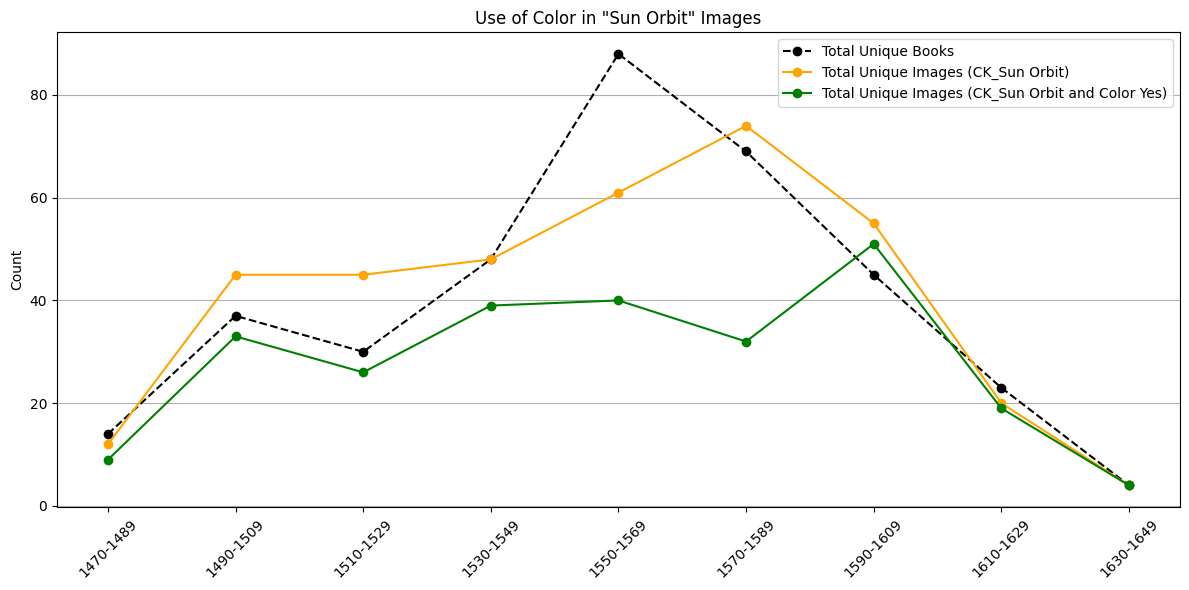

In [35]:
# Convert 'year' to int
sun_motion_visual['year'] = sun_motion_visual['year'].astype(int)
books['year'] = books['year'].astype(int)

# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals
sun_motion_visual['interval'] = pd.cut(sun_motion_visual['year'], bins=bins, labels=labels, right=False)
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Count total unique books per interval
total_unique_books_per_interval = books.groupby('interval', observed=False)['book'].nunique().reindex(labels, fill_value=0)

# Count total unique images with 'CK_Sun Orbit' per interval
unique_images_ck_sun_orbit = sun_motion_visual[sun_motion_visual['cks'].str.contains('CK_Sun Orbit', na=False)]
total_unique_images_ck_sun_orbit_per_interval = unique_images_ck_sun_orbit.groupby('interval', observed=False)['images'].nunique().reindex(labels, fill_value=0)

# Count total unique images with 'CK_Sun Orbit' and 'color' as 'yes' per interval
unique_images_color_yes = unique_images_ck_sun_orbit[unique_images_ck_sun_orbit['color'] == 'yes']
total_unique_images_color_yes_per_interval = unique_images_color_yes.groupby('interval', observed=False)['images'].nunique().reindex(labels, fill_value=0)

# Prepare data for plotting
summary_data = pd.DataFrame({
    'Interval': labels,
    'Total Unique Books': total_unique_books_per_interval,
    'Total Unique Images (CK_Sun Orbit)': total_unique_images_ck_sun_orbit_per_interval,
    'Total Unique Images (CK_Sun Orbit and Color Yes)': total_unique_images_color_yes_per_interval
})

# Create a line graph
plt.figure(figsize=(12, 6))
plt.plot(summary_data['Interval'], summary_data['Total Unique Books'], marker='o', linestyle='--', color='black', label='Total Unique Books')  # Broken black line
plt.plot(summary_data['Interval'], summary_data['Total Unique Images (CK_Sun Orbit)'], marker='o', linestyle='-', label='Total Unique Images (CK_Sun Orbit)', color='orange')
plt.plot(summary_data['Interval'], summary_data['Total Unique Images (CK_Sun Orbit and Color Yes)'], marker='o', linestyle='-', label='Total Unique Images (CK_Sun Orbit and Color Yes)', color='green')

# Formatting the plot
plt.ylabel('Count')
plt.title('Use of Color in "Sun Orbit" Images')
plt.legend()
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


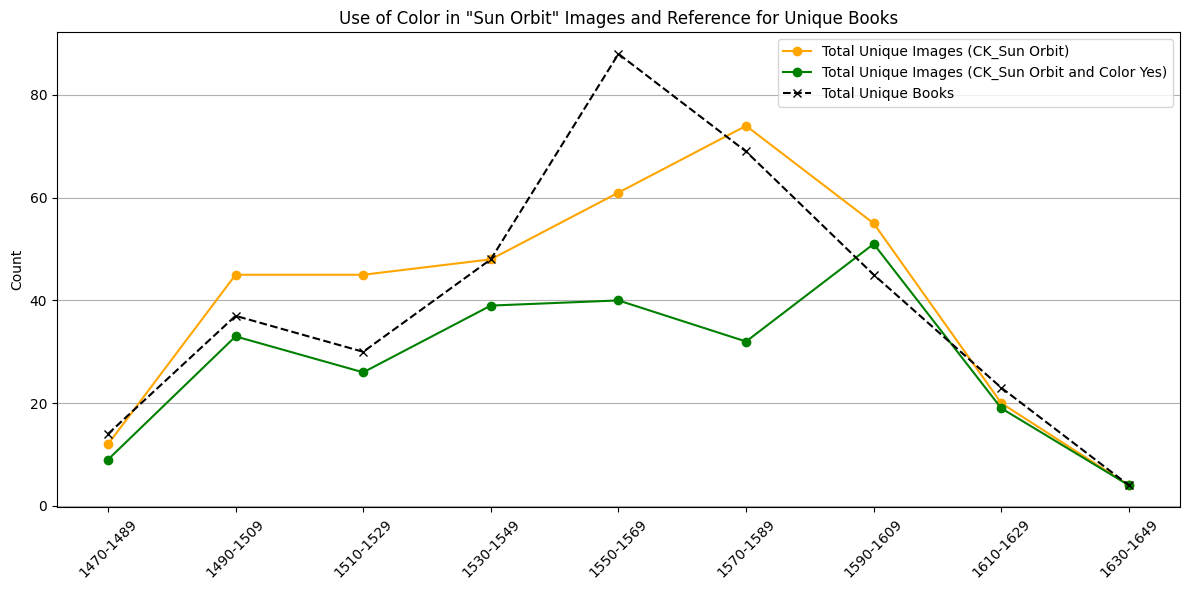

In [40]:
# Convert 'year' to int
sun_motion_visual['year'] = sun_motion_visual['year'].astype(int)
books['year'] = books['year'].astype(int)

# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals
sun_motion_visual['interval'] = pd.cut(sun_motion_visual['year'], bins=bins, labels=labels, right=False)
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Filter for rows with cks value "CK_Sun Orbit"
filtered_sun_orbit = sun_motion_visual[sun_motion_visual['cks'] == 'CK_Sun Orbit']

# Count total unique images per interval
total_unique_images_per_interval = filtered_sun_orbit.groupby('interval', observed=True)['images'].nunique().reindex(labels, fill_value=0)

# Count total unique images with 'color' as 'yes' per interval
total_unique_images_color_yes_per_interval = filtered_sun_orbit[filtered_sun_orbit['color'] == 'yes'].groupby('interval', observed=True)['images'].nunique().reindex(labels, fill_value=0)

# Count total unique books per interval
total_unique_books_per_interval = books.groupby('interval', observed=True)['book'].nunique().reindex(labels, fill_value=0)  # Assuming 'title' is the book name column

# Prepare data for plotting
summary_data = pd.DataFrame({
    'Interval': labels,
    'Total Unique Images (CK_Sun Orbit)': total_unique_images_per_interval,
    'Total Unique Images (CK_Sun Orbit and Color Yes)': total_unique_images_color_yes_per_interval,
    'Total Unique Books': total_unique_books_per_interval
})

# Create a line graph
plt.figure(figsize=(12, 6))
plt.plot(summary_data['Interval'], summary_data['Total Unique Images (CK_Sun Orbit)'], marker='o', linestyle='-', label='Total Unique Images (CK_Sun Orbit)', color='orange')
plt.plot(summary_data['Interval'], summary_data['Total Unique Images (CK_Sun Orbit and Color Yes)'], marker='o', linestyle='-', label='Total Unique Images (CK_Sun Orbit and Color Yes)', color='green')
plt.plot(summary_data['Interval'], summary_data['Total Unique Books'], marker='x', linestyle='--', color='black', label='Total Unique Books')  # Reference line

# Formatting the plot
plt.ylabel('Count')
plt.title('Use of Color in "Sun Orbit" Images and Reference for Unique Books')
plt.legend()
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

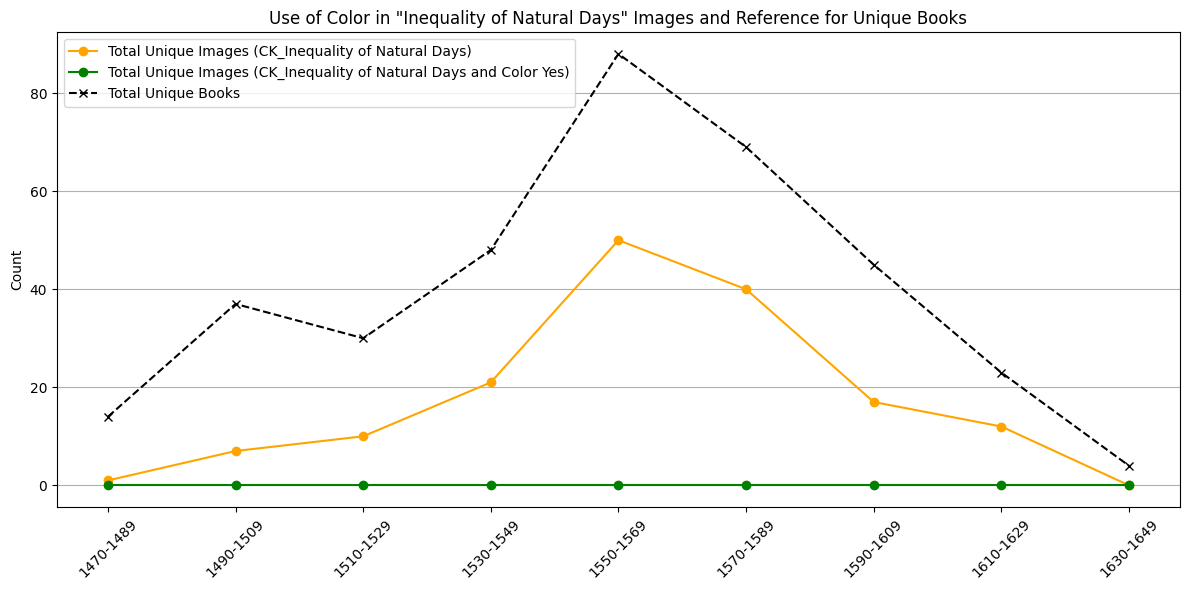

In [41]:
# Convert 'year' to int
sun_motion_visual['year'] = sun_motion_visual['year'].astype(int)
books['year'] = books['year'].astype(int)

# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals
sun_motion_visual['interval'] = pd.cut(sun_motion_visual['year'], bins=bins, labels=labels, right=False)
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Filter for rows with cks value "CK_Sun Orbit"
filtered_sun_orbit = sun_motion_visual[sun_motion_visual['cks'] == 'CK_Inequality of Natural Days']

# Count total unique images per interval
total_unique_images_per_interval = filtered_sun_orbit.groupby('interval', observed=True)['images'].nunique().reindex(labels, fill_value=0)

# Count total unique images with 'color' as 'yes' per interval
total_unique_images_color_yes_per_interval = filtered_sun_orbit[filtered_sun_orbit['color'] == 'yes'].groupby('interval', observed=True)['images'].nunique().reindex(labels, fill_value=0)

# Count total unique books per interval
total_unique_books_per_interval = books.groupby('interval', observed=True)['book'].nunique().reindex(labels, fill_value=0)  # Assuming 'title' is the book name column

# Prepare data for plotting
summary_data = pd.DataFrame({
    'Interval': labels,
    'Total Unique Images (CK_Inequality of Natural Days)': total_unique_images_per_interval,
    'Total Unique Images (CK_Inequality of Natural Days and Color Yes)': total_unique_images_color_yes_per_interval,
    'Total Unique Books': total_unique_books_per_interval
})

# Create a line graph
plt.figure(figsize=(12, 6))
plt.plot(summary_data['Interval'], summary_data['Total Unique Images (CK_Inequality of Natural Days)'], marker='o', linestyle='-', label='Total Unique Images (CK_Inequality of Natural Days)', color='orange')
plt.plot(summary_data['Interval'], summary_data['Total Unique Images (CK_Inequality of Natural Days and Color Yes)'], marker='o', linestyle='-', label='Total Unique Images (CK_Inequality of Natural Days and Color Yes)', color='green')
plt.plot(summary_data['Interval'], summary_data['Total Unique Books'], marker='x', linestyle='--', color='black', label='Total Unique Books')  # Reference line

# Formatting the plot
plt.ylabel('Count')
plt.title('Use of Color in "Inequality of Natural Days" Images and Reference for Unique Books')
plt.legend()
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

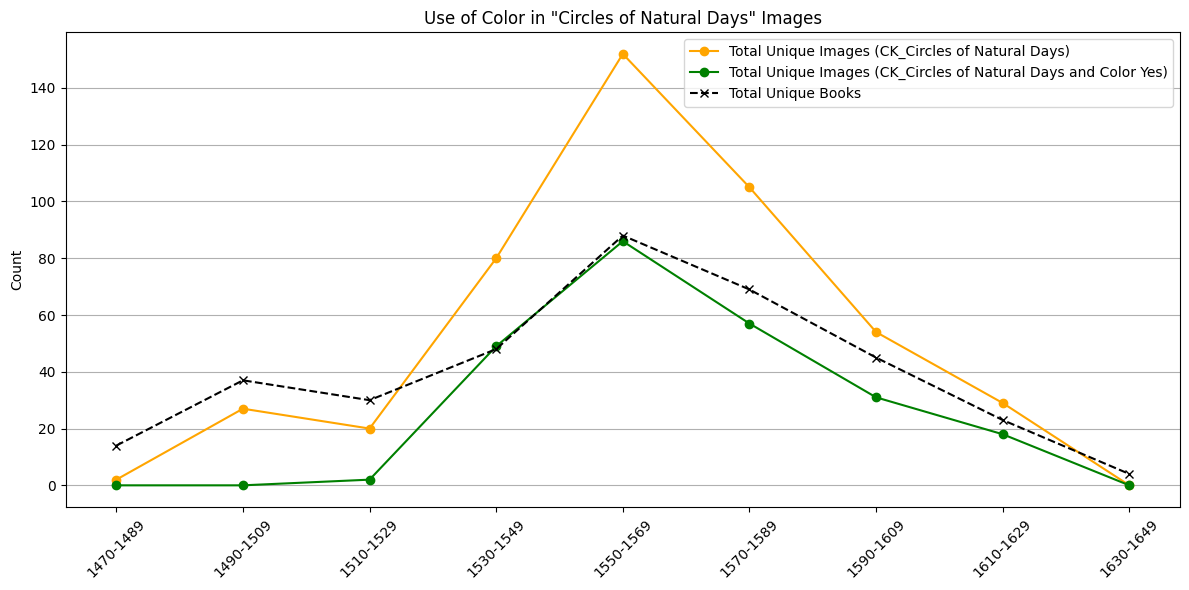

In [43]:
# Convert 'year' to int
sun_motion_visual['year'] = sun_motion_visual['year'].astype(int)
books['year'] = books['year'].astype(int)

# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals
sun_motion_visual['interval'] = pd.cut(sun_motion_visual['year'], bins=bins, labels=labels, right=False)
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Filter for rows with cks value "CK_Circles of Natural Days"
filtered_sun_orbit = sun_motion_visual[sun_motion_visual['cks'] == 'CK_Circles of Natural Days']

# Count total unique images per interval
total_unique_images_per_interval = filtered_sun_orbit.groupby('interval', observed=True)['images'].nunique().reindex(labels, fill_value=0)

# Count total unique images with 'color' as 'yes' per interval
total_unique_images_color_yes_per_interval = filtered_sun_orbit[filtered_sun_orbit['color'] == 'yes'].groupby('interval', observed=True)['images'].nunique().reindex(labels, fill_value=0)

# Count total unique books per interval
total_unique_books_per_interval = books.groupby('interval', observed=True)['book'].nunique().reindex(labels, fill_value=0)  # Assuming 'book' is the book name column

# Prepare data for plotting
summary_data = pd.DataFrame({
    'Interval': labels,
    'Total Unique Images (CK_Circles of Natural Days)': total_unique_images_per_interval,
    'Total Unique Images (CK_Circles of Natural Days and Color Yes)': total_unique_images_color_yes_per_interval,
    'Total Unique Books': total_unique_books_per_interval
})

# Create a line graph
plt.figure(figsize=(12, 6))
plt.plot(summary_data['Interval'], summary_data['Total Unique Images (CK_Circles of Natural Days)'], marker='o', linestyle='-', label='Total Unique Images (CK_Circles of Natural Days)', color='orange')
plt.plot(summary_data['Interval'], summary_data['Total Unique Images (CK_Circles of Natural Days and Color Yes)'], marker='o', linestyle='-', label='Total Unique Images (CK_Circles of Natural Days and Color Yes)', color='green')
plt.plot(summary_data['Interval'], summary_data['Total Unique Books'], marker='x', linestyle='--', color='black', label='Total Unique Books')  # Reference line

# Formatting the plot
plt.ylabel('Count')
plt.title('Use of Color in "Circles of Natural Days" Images')
plt.legend()
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

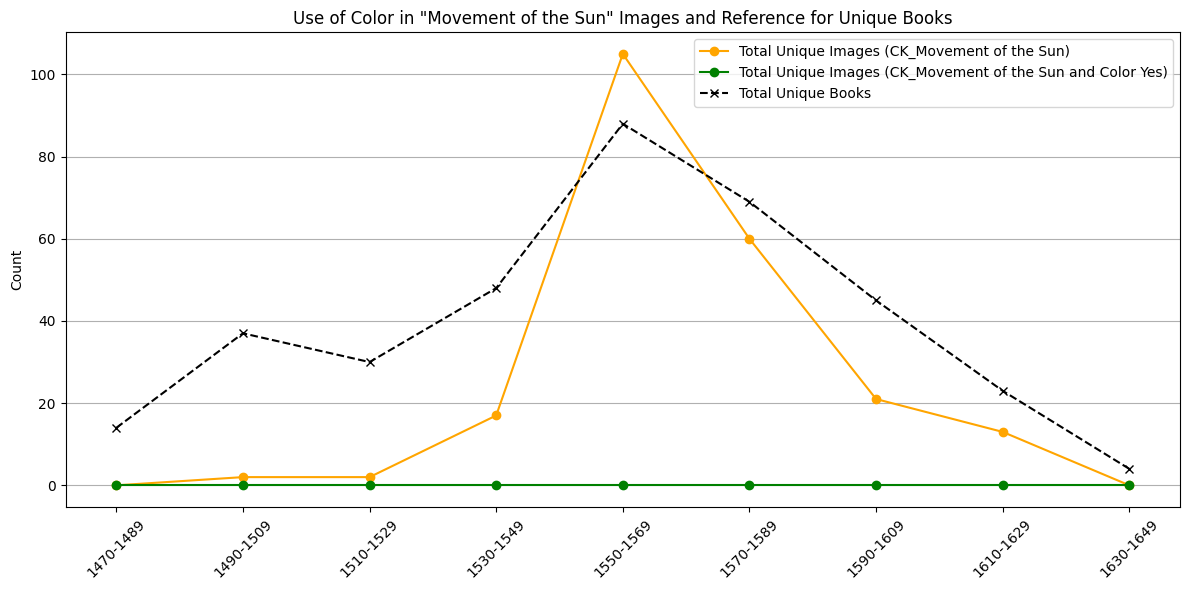

In [44]:
# Convert 'year' to int
sun_motion_visual['year'] = sun_motion_visual['year'].astype(int)
books['year'] = books['year'].astype(int)

# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals
sun_motion_visual['interval'] = pd.cut(sun_motion_visual['year'], bins=bins, labels=labels, right=False)
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Filter for rows with cks value "CK_Movement of the Sun"
filtered_sun_orbit = sun_motion_visual[sun_motion_visual['cks'] == 'CK_Movement of the Sun']

# Count total unique images per interval
total_unique_images_per_interval = filtered_sun_orbit.groupby('interval', observed=True)['images'].nunique().reindex(labels, fill_value=0)

# Count total unique images with 'color' as 'yes' per interval
total_unique_images_color_yes_per_interval = filtered_sun_orbit[filtered_sun_orbit['color'] == 'yes'].groupby('interval', observed=True)['images'].nunique().reindex(labels, fill_value=0)

# Count total unique books per interval
total_unique_books_per_interval = books.groupby('interval', observed=True)['book'].nunique().reindex(labels, fill_value=0)  # Assuming 'book' is the book name column

# Prepare data for plotting
summary_data = pd.DataFrame({
    'Interval': labels,
    'Total Unique Images (CK_Movement of the Sun)': total_unique_images_per_interval,
    'Total Unique Images (CK_Movement of the Sun and Color Yes)': total_unique_images_color_yes_per_interval,
    'Total Unique Books': total_unique_books_per_interval
})

# Create a line graph
plt.figure(figsize=(12, 6))
plt.plot(summary_data['Interval'], summary_data['Total Unique Images (CK_Movement of the Sun)'], marker='o', linestyle='-', label='Total Unique Images (CK_Movement of the Sun)', color='orange')
plt.plot(summary_data['Interval'], summary_data['Total Unique Images (CK_Movement of the Sun and Color Yes)'], marker='o', linestyle='-', label='Total Unique Images (CK_Movement of the Sun and Color Yes)', color='green')
plt.plot(summary_data['Interval'], summary_data['Total Unique Books'], marker='x', linestyle='--', color='black', label='Total Unique Books')  # Reference line

# Formatting the plot
plt.ylabel('Count')
plt.title('Use of Color in "Movement of the Sun" Images and Reference for Unique Books')
plt.legend()
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

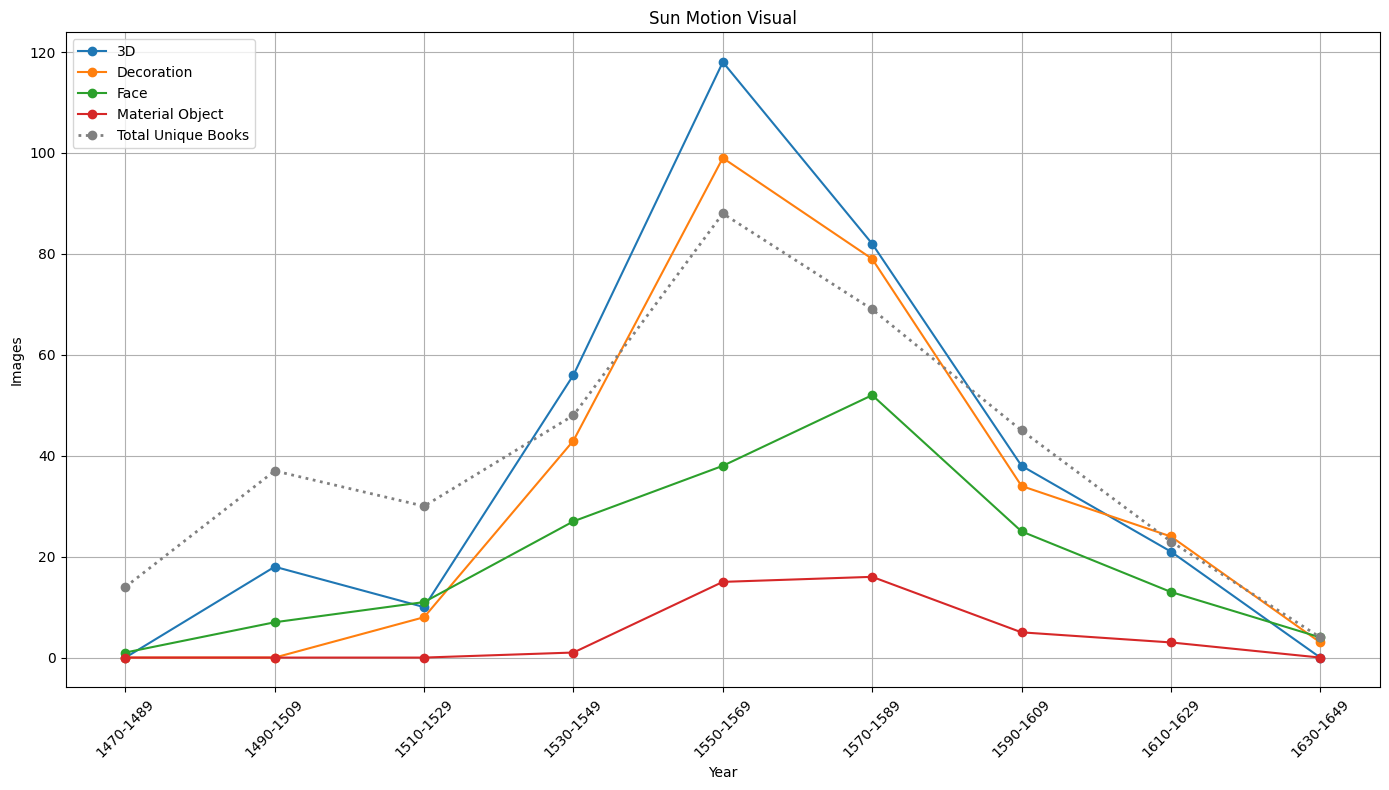

In [45]:
# Convert 'year' to int
sun_motion_visual['year'] = sun_motion_visual['year'].astype(int)
books['year'] = books['year'].astype(int)

# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals
sun_motion_visual['interval'] = pd.cut(sun_motion_visual['year'], bins=bins, labels=labels, right=False)
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Function to count unique images by column
def count_unique_images_by_column(column_name, value):
    filtered_df = sun_motion_visual[sun_motion_visual[column_name] == value]
    return filtered_df.groupby('interval', observed=False)['images'].nunique().reindex(labels, fill_value=0)

# Collect data with updated column names
color = count_unique_images_by_column('color', 'yes')
three_dimensions_effect = count_unique_images_by_column('3D', 'yes')
decoration = count_unique_images_by_column('decoration', 'yes')
face = count_unique_images_by_column('face', 'yes')
multiple_moments = count_unique_images_by_column('multiple moments', 'yes')
sign_symbols = count_unique_images_by_column('sign symbols', 'yes')
numbers = count_unique_images_by_column('numbers', 'yes')
material_object = count_unique_images_by_column('material object', 'yes')
multiple_subjects_sun_and_moon = count_unique_images_by_column('multiple subjects sun and moon', 'yes')
tabular_illustration = count_unique_images_by_column('tabular illustration', 'yes')
human_figures = count_unique_images_by_column('human figures', 'yes')
oblique_circles = count_unique_images_by_column('oblique circles two dimensional projection', 'yes')

# Combine the data for lines
side_by_side_data = pd.DataFrame({
#   'Color': color,
   '3D': three_dimensions_effect,
   'Decoration': decoration,
   'Face': face,
#   'Multiple Moments': multiple_moments,
#   'Sign Symbols': sign_symbols,
#   'Numbers': numbers,
   'Material Object': material_object,
#   'Multiple Subjects Sun and Moon': multiple_subjects_sun_and_moon,
#    'Oblique Circles': oblique_circles,
})

# Calculate total unique books and images for each interval
total_unique_books_df = books.groupby('interval', observed=False)['book'].nunique().reindex(labels, fill_value=0)
total_unique_images = sun_motion_visual.groupby('interval', observed=False)['images'].nunique().reindex(labels, fill_value=0)

# Plot lines with single y-axis
fig, ax = plt.subplots(figsize=(14, 8))

# Plot lines for each category on primary y-axis
for column in side_by_side_data.columns:
    ax.plot(labels, side_by_side_data[column], marker='o', linestyle='-', label=column)

# Plot lines for total unique images and total unique books
#ax.plot(labels, total_unique_images, marker='o', linestyle='--', color='black', label='Total Unique Images', linewidth=2)
ax.plot(labels, total_unique_books_df, marker='o', linestyle=':', color='gray', label='Total Unique Books', linewidth=2)

# Formatting the plot
ax.set_xlabel('Year')
ax.set_ylabel('Images')
ax.set_title('Sun Motion Visual')
ax.legend(loc='upper left')
ax.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


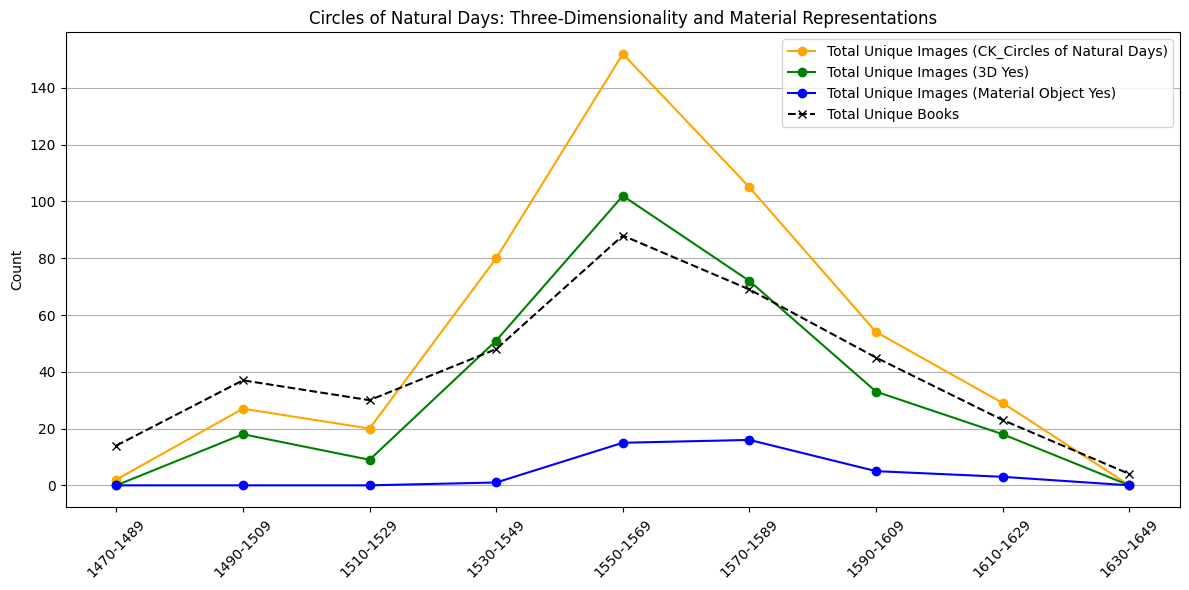

In [49]:
# Convert 'year' to int
sun_motion_visual['year'] = sun_motion_visual['year'].astype(int)
books['year'] = books['year'].astype(int)

# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals
sun_motion_visual['interval'] = pd.cut(sun_motion_visual['year'], bins=bins, labels=labels, right=False)
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Filter for rows with cks value "CK_Circles of Natural Days"
filtered = sun_motion_visual[sun_motion_visual['cks'] == 'CK_Circles of Natural Days']

# Count total unique images per interval
total_unique_images_per_interval = filtered.groupby('interval', observed=True)['images'].nunique().reindex(labels, fill_value=0)

# Count total unique images with '3D' as 'yes' per interval
total_unique_images_3D_yes_per_interval = filtered[filtered['3D'] == 'yes'].groupby('interval', observed=True)['images'].nunique().reindex(labels, fill_value=0)

# Count total unique images with 'material object' as 'yes' per interval
total_unique_images_material_yes_per_interval = filtered[filtered['material object'] == 'yes'].groupby('interval', observed=True)['images'].nunique().reindex(labels, fill_value=0)

# Count total unique books per interval
total_unique_books_per_interval = books.groupby('interval', observed=True)['book'].nunique().reindex(labels, fill_value=0)  # Assuming 'book' is the book name column

# Prepare data for plotting
summary_data = pd.DataFrame({
    'Interval': labels,
    'Total Unique Images (CK_Circles of Natural Days)': total_unique_images_per_interval,
    'Total Unique Images (3D Yes)': total_unique_images_3D_yes_per_interval,
    'Total Unique Images (Material Object Yes)': total_unique_images_material_yes_per_interval,
    'Total Unique Books': total_unique_books_per_interval
})

# Create a line graph
plt.figure(figsize=(12, 6))
plt.plot(summary_data['Interval'], summary_data['Total Unique Images (CK_Circles of Natural Days)'], marker='o', linestyle='-', label='Total Unique Images (CK_Circles of Natural Days)', color='orange')
plt.plot(summary_data['Interval'], summary_data['Total Unique Images (3D Yes)'], marker='o', linestyle='-', label='Total Unique Images (3D Yes)', color='green')
plt.plot(summary_data['Interval'], summary_data['Total Unique Images (Material Object Yes)'], marker='o', linestyle='-', label='Total Unique Images (Material Object Yes)', color='blue')
plt.plot(summary_data['Interval'], summary_data['Total Unique Books'], marker='x', linestyle='--', color='black', label='Total Unique Books')  # Reference line

# Formatting the plot
plt.ylabel('Count')
plt.title('Circles of Natural Days: Three-Dimensionality and Material Representations')
plt.legend()
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

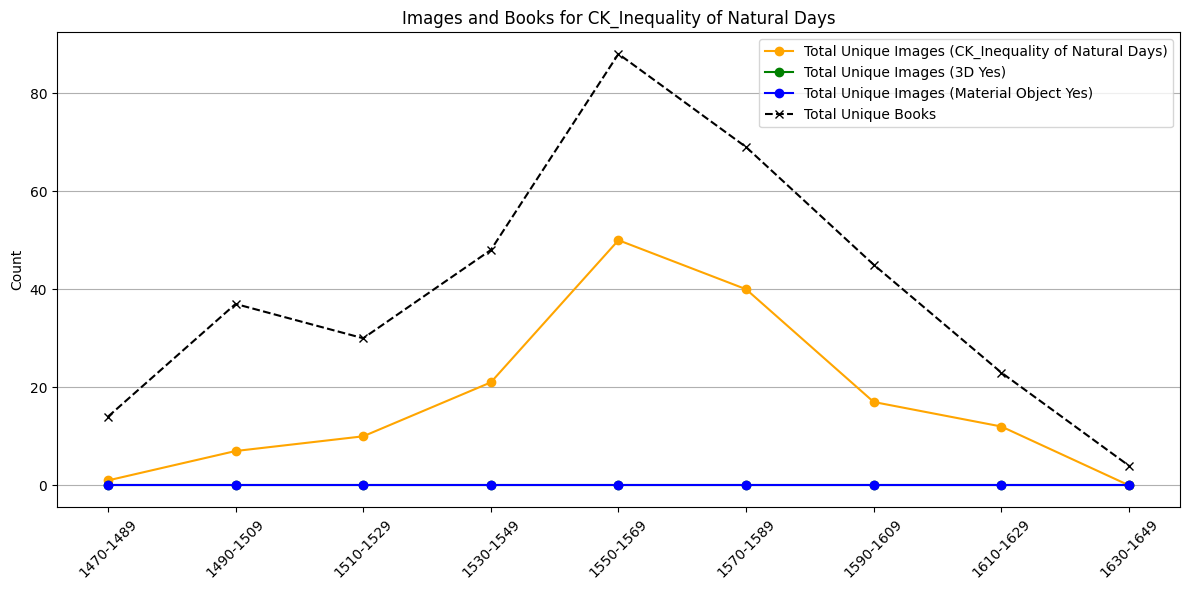

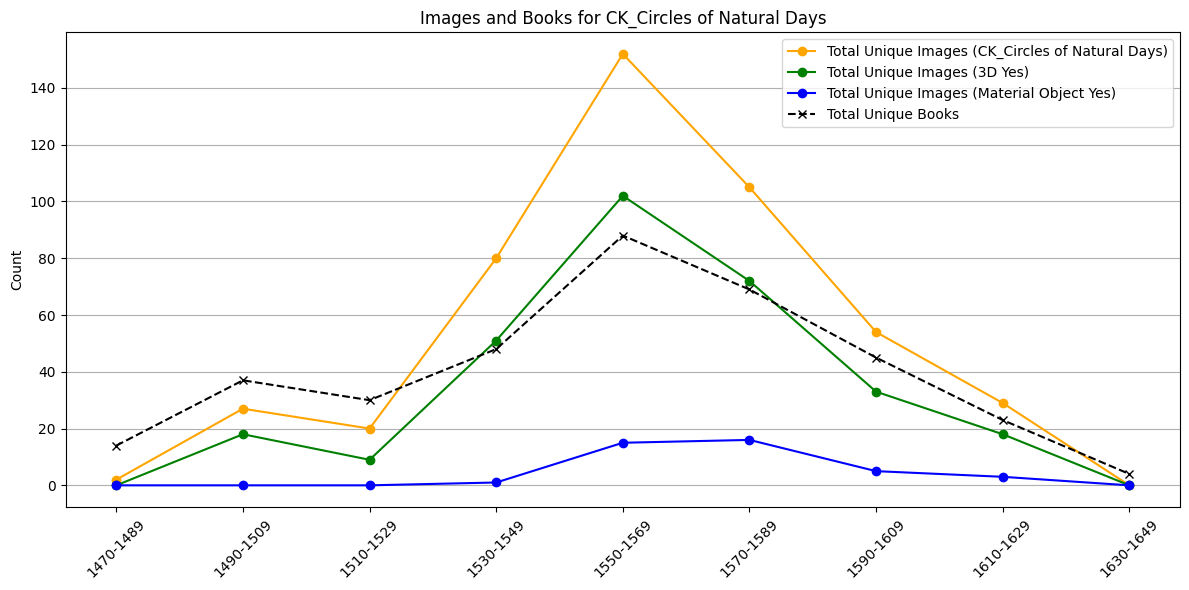

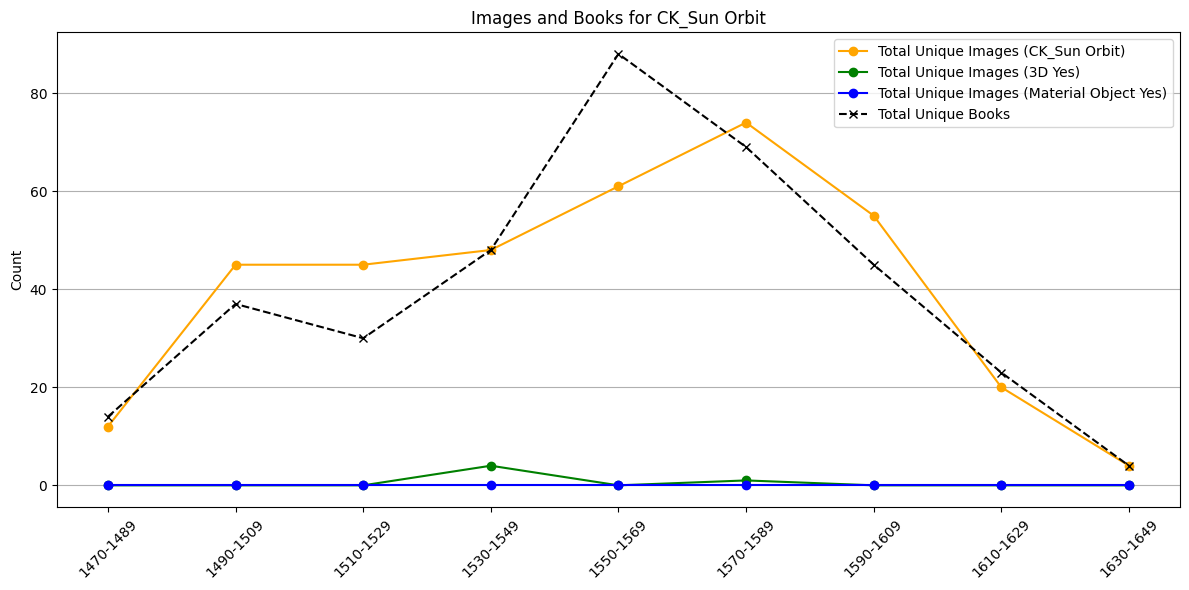

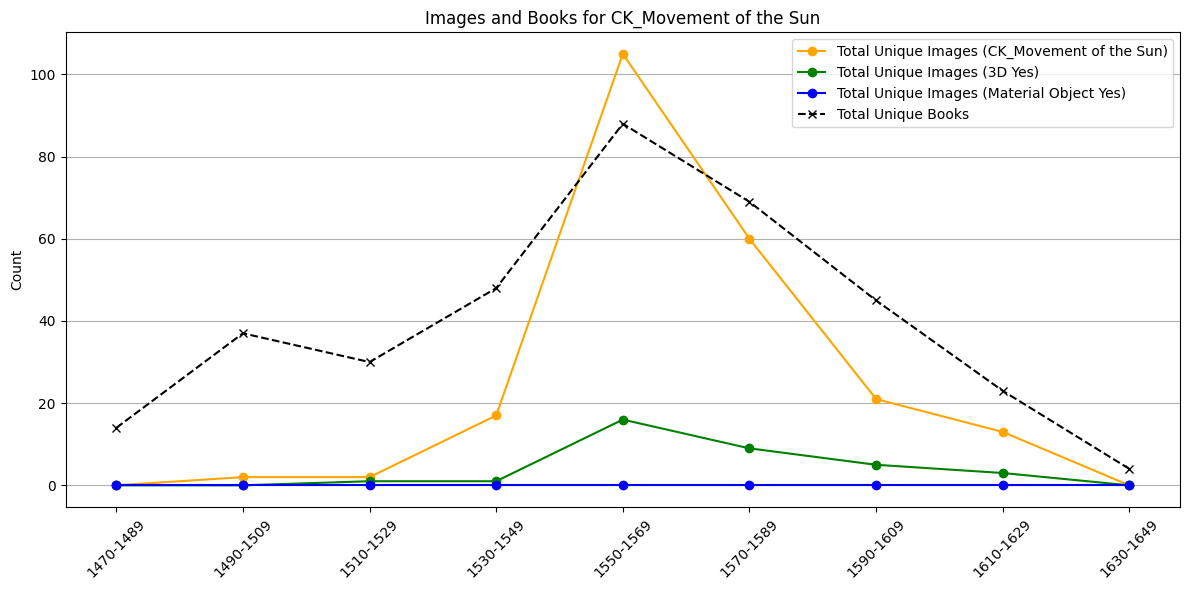

In [50]:
# Convert 'year' to int
sun_motion_visual['year'] = sun_motion_visual['year'].astype(int)
books['year'] = books['year'].astype(int)

# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals
sun_motion_visual['interval'] = pd.cut(sun_motion_visual['year'], bins=bins, labels=labels, right=False)
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Function to process each keyword
def plot_keyword_data(keyword):
    # Filter for rows with the specified cks value
    filtered = sun_motion_visual[sun_motion_visual['cks'] == keyword]

    # Count total unique images per interval
    total_unique_images_per_interval = filtered.groupby('interval', observed=True)['images'].nunique().reindex(labels, fill_value=0)

    # Count total unique images with '3D' as 'yes' per interval
    total_unique_images_3D_yes_per_interval = filtered[filtered['3D'] == 'yes'].groupby('interval', observed=True)['images'].nunique().reindex(labels, fill_value=0)

    # Count total unique images with 'material object' as 'yes' per interval
    total_unique_images_material_yes_per_interval = filtered[filtered['material object'] == 'yes'].groupby('interval', observed=True)['images'].nunique().reindex(labels, fill_value=0)

    # Count total unique books per interval
    total_unique_books_per_interval = books.groupby('interval', observed=True)['book'].nunique().reindex(labels, fill_value=0)

    # Prepare data for plotting
    summary_data = pd.DataFrame({
        'Interval': labels,
        'Total Unique Images': total_unique_images_per_interval,
        'Total Unique Images (3D Yes)': total_unique_images_3D_yes_per_interval,
        'Total Unique Images (Material Object Yes)': total_unique_images_material_yes_per_interval,
        'Total Unique Books': total_unique_books_per_interval
    })

    # Create a line graph
    plt.figure(figsize=(12, 6))
    plt.plot(summary_data['Interval'], summary_data['Total Unique Images'], marker='o', linestyle='-', label=f'Total Unique Images ({keyword})', color='orange')
    plt.plot(summary_data['Interval'], summary_data['Total Unique Images (3D Yes)'], marker='o', linestyle='-', label='Total Unique Images (3D Yes)', color='green')
    plt.plot(summary_data['Interval'], summary_data['Total Unique Images (Material Object Yes)'], marker='o', linestyle='-', label='Total Unique Images (Material Object Yes)', color='blue')
    plt.plot(summary_data['Interval'], summary_data['Total Unique Books'], marker='x', linestyle='--', color='black', label='Total Unique Books')  # Reference line

    # Formatting the plot
    plt.ylabel('Count')
    plt.title(f'Images and Books for {keyword}')
    plt.legend()
    plt.grid(axis='y')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# List of keywords
keywords = [
    'CK_Inequality of Natural Days',
    'CK_Circles of Natural Days',
    'CK_Sun Orbit',
    'CK_Movement of the Sun'
]

# Plot data for each keyword
for keyword in keywords:
    plot_keyword_data(keyword)

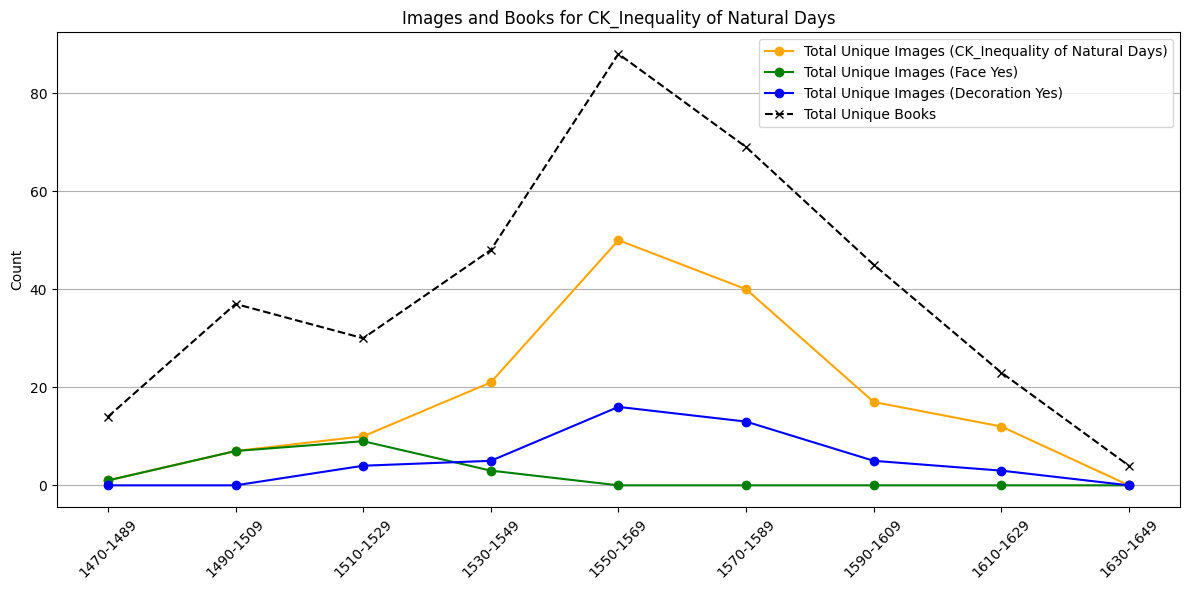

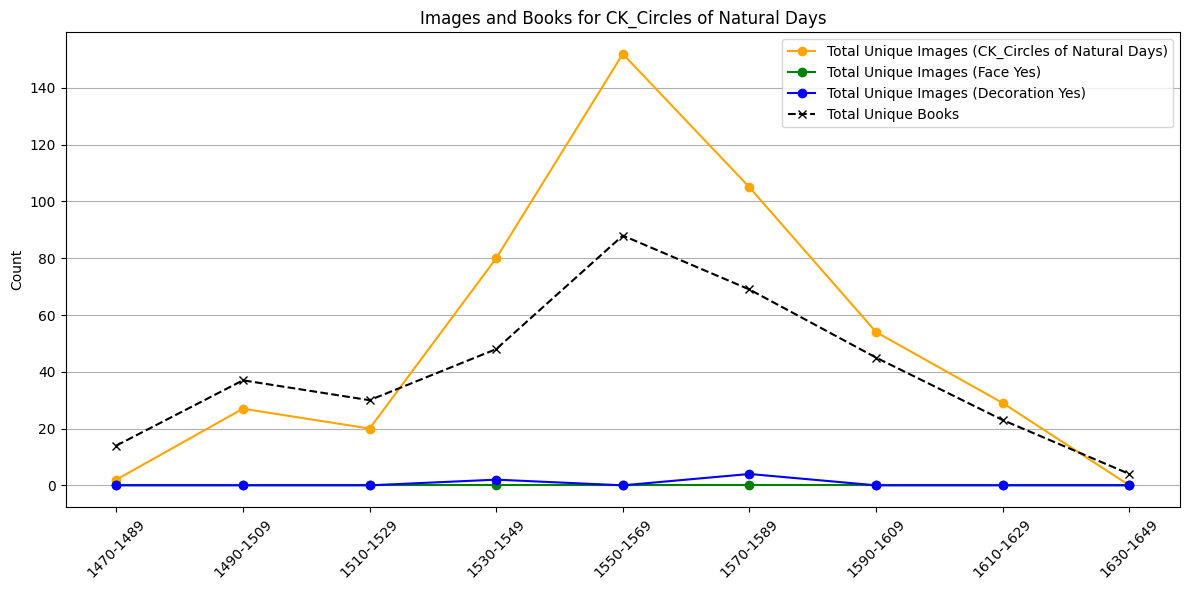

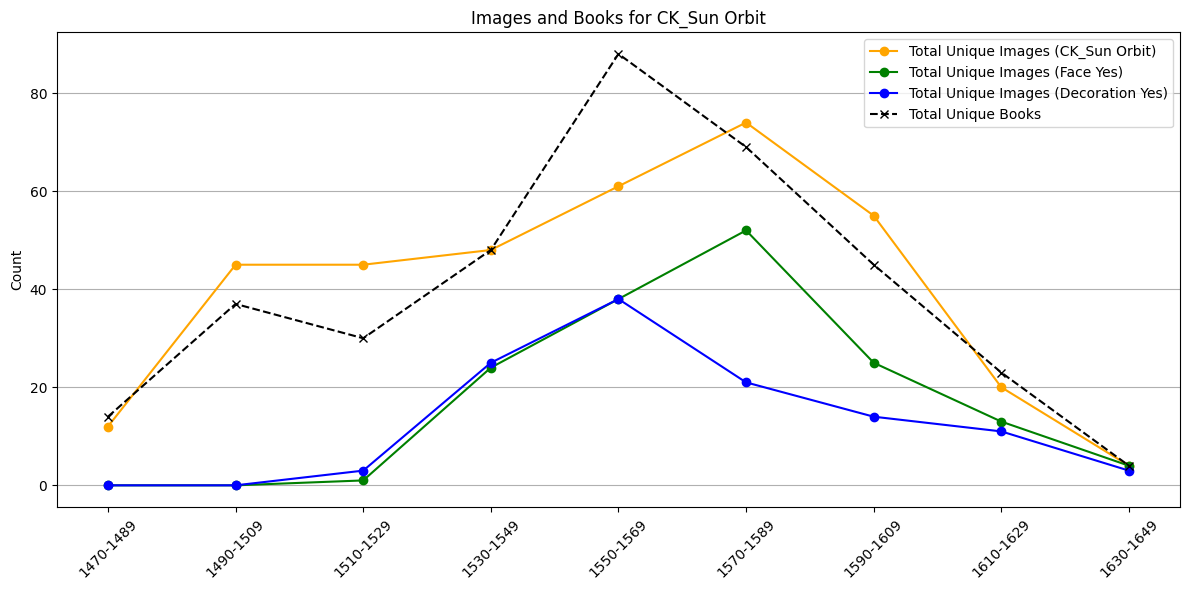

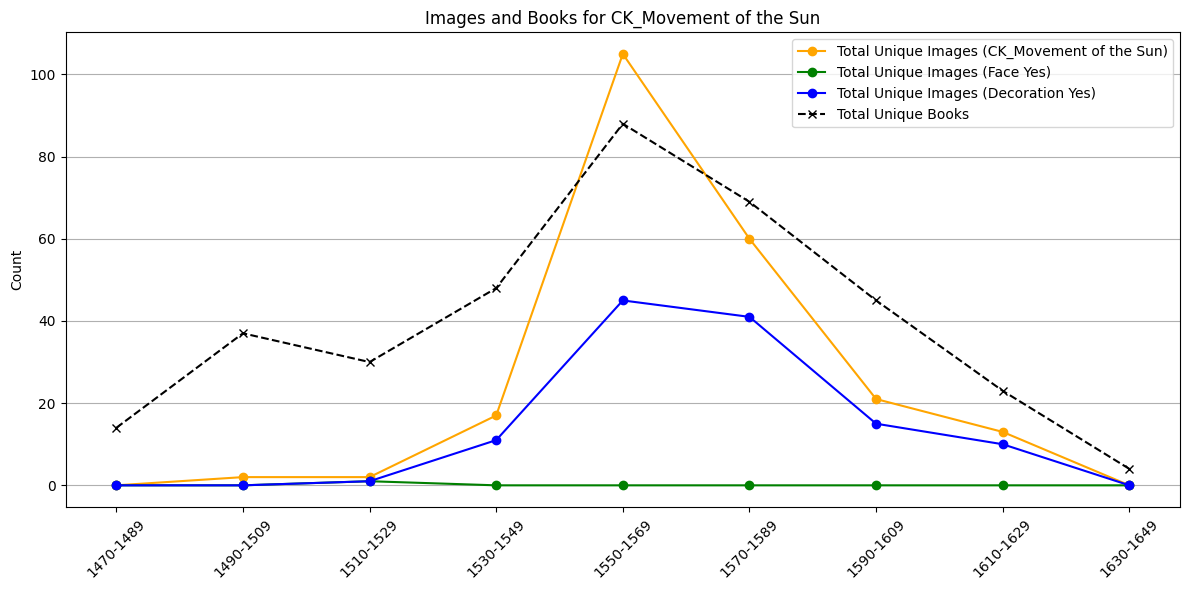

In [51]:
# Convert 'year' to int
sun_motion_visual['year'] = sun_motion_visual['year'].astype(int)
books['year'] = books['year'].astype(int)

# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals
sun_motion_visual['interval'] = pd.cut(sun_motion_visual['year'], bins=bins, labels=labels, right=False)
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Function to process each keyword
def plot_keyword_data(keyword):
    # Filter for rows with the specified cks value
    filtered = sun_motion_visual[sun_motion_visual['cks'] == keyword]

    # Count total unique images per interval
    total_unique_images_per_interval = filtered.groupby('interval', observed=True)['images'].nunique().reindex(labels, fill_value=0)

    # Count total unique images with 'face' as 'yes' per interval
    total_unique_images_face_yes_per_interval = filtered[filtered['face'] == 'yes'].groupby('interval', observed=True)['images'].nunique().reindex(labels, fill_value=0)

    # Count total unique images with 'decoration' as 'yes' per interval
    total_unique_images_decoration_yes_per_interval = filtered[filtered['decoration'] == 'yes'].groupby('interval', observed=True)['images'].nunique().reindex(labels, fill_value=0)

    # Count total unique books per interval
    total_unique_books_per_interval = books.groupby('interval', observed=True)['book'].nunique().reindex(labels, fill_value=0)

    # Prepare data for plotting
    summary_data = pd.DataFrame({
        'Interval': labels,
        'Total Unique Images': total_unique_images_per_interval,
        'Total Unique Images (Face Yes)': total_unique_images_face_yes_per_interval,
        'Total Unique Images (Decoration Yes)': total_unique_images_decoration_yes_per_interval,
        'Total Unique Books': total_unique_books_per_interval
    })

    # Create a line graph
    plt.figure(figsize=(12, 6))
    plt.plot(summary_data['Interval'], summary_data['Total Unique Images'], marker='o', linestyle='-', label=f'Total Unique Images ({keyword})', color='orange')
    plt.plot(summary_data['Interval'], summary_data['Total Unique Images (Face Yes)'], marker='o', linestyle='-', label='Total Unique Images (Face Yes)', color='green')
    plt.plot(summary_data['Interval'], summary_data['Total Unique Images (Decoration Yes)'], marker='o', linestyle='-', label='Total Unique Images (Decoration Yes)', color='blue')
    plt.plot(summary_data['Interval'], summary_data['Total Unique Books'], marker='x', linestyle='--', color='black', label='Total Unique Books')  # Reference line

    # Formatting the plot
    plt.ylabel('Count')
    plt.title(f'Images and Books for {keyword}')
    plt.legend()
    plt.grid(axis='y')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# List of keywords
keywords = [
    'CK_Inequality of Natural Days',
    'CK_Circles of Natural Days',
    'CK_Sun Orbit',
    'CK_Movement of the Sun'
]

# Plot data for each keyword
for keyword in keywords:
    plot_keyword_data(keyword)

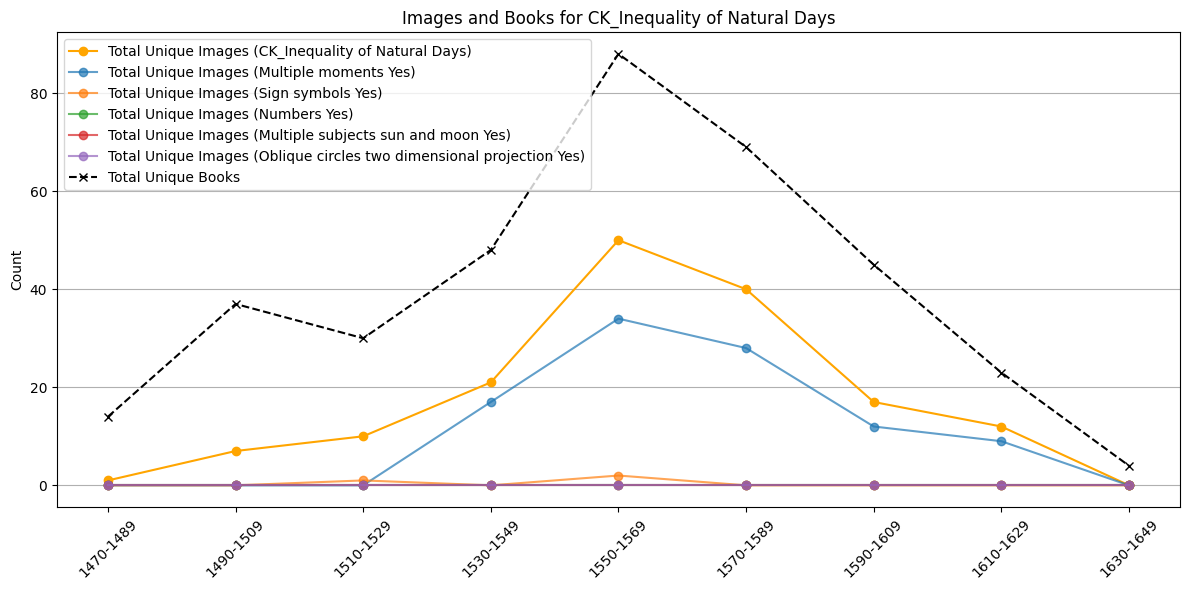

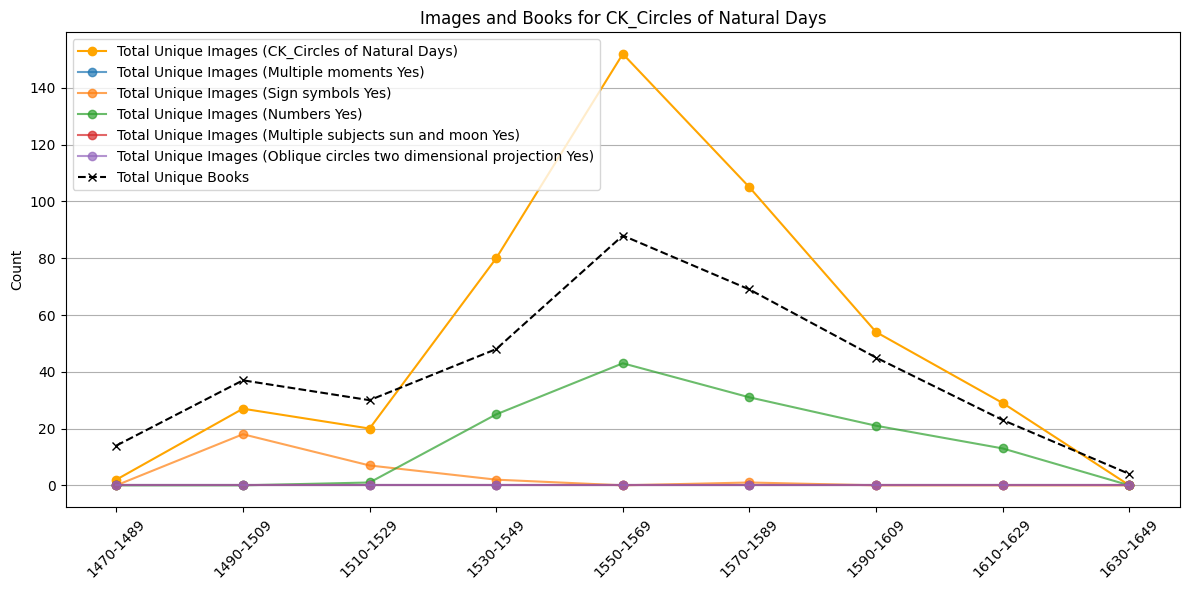

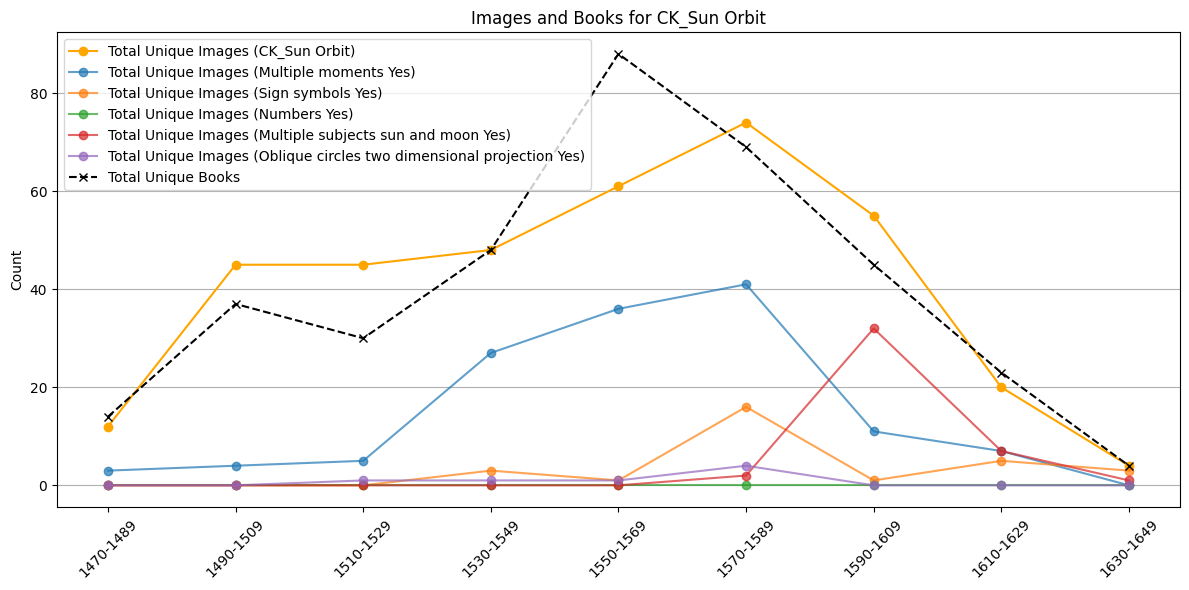

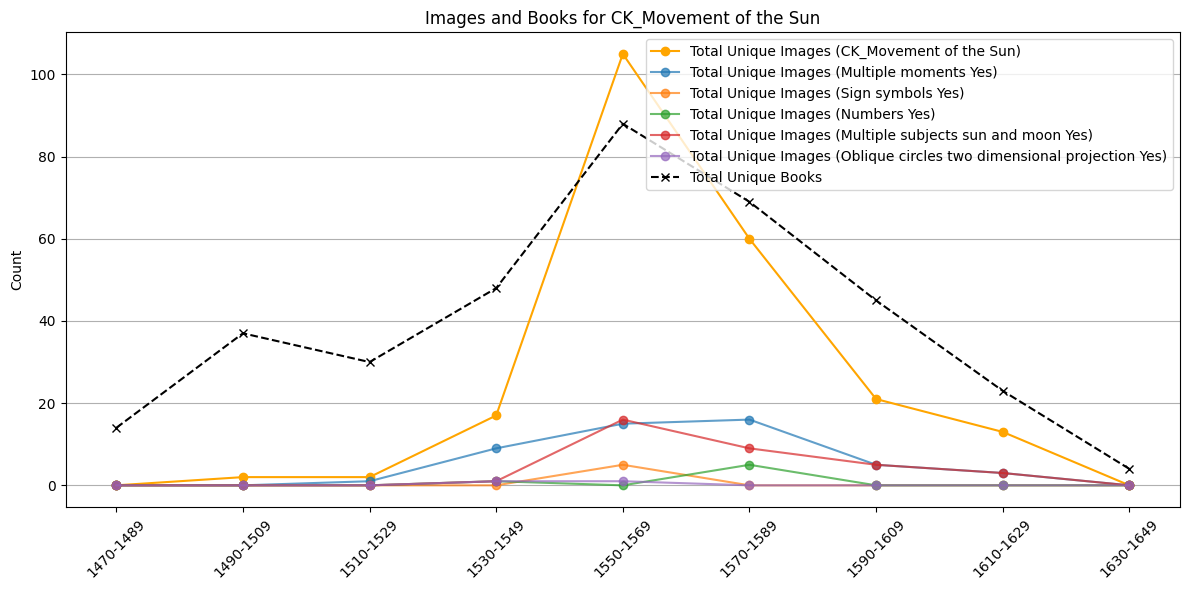

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrames (replace with your actual DataFrames)
# sun_motion_visual = pd.DataFrame(...)
# books = pd.DataFrame(...)

# Convert 'year' to int
sun_motion_visual['year'] = sun_motion_visual['year'].astype(int)
books['year'] = books['year'].astype(int)

# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals
sun_motion_visual['interval'] = pd.cut(sun_motion_visual['year'], bins=bins, labels=labels, right=False)
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Function to process each keyword
def plot_keyword_data(keyword):
    # Filter for rows with the specified cks value
    filtered = sun_motion_visual[sun_motion_visual['cks'] == keyword]

    # Count total unique images per interval
    total_unique_images_per_interval = filtered.groupby('interval', observed=True)['images'].nunique().reindex(labels, fill_value=0)

    # Define the columns to check for 'yes' values
    columns_to_check = [
        'multiple moments',
        'sign symbols',
        'numbers',
        'multiple subjects sun and moon',
        'oblique circles two dimensional projection'
    ]

    # Prepare data for plotting
    summary_data = pd.DataFrame({
        'Interval': labels,
        'Total Unique Images': total_unique_images_per_interval
    })

    # Count unique images for each specified column
    for column in columns_to_check:
        total_unique_images_yes_per_interval = filtered[filtered[column] == 'yes'].groupby('interval', observed=True)['images'].nunique().reindex(labels, fill_value=0)
        summary_data[f'Total Unique Images ({column.capitalize()} Yes)'] = total_unique_images_yes_per_interval

    # Create a line graph
    plt.figure(figsize=(12, 6))
    plt.plot(summary_data['Interval'], summary_data['Total Unique Images'], marker='o', linestyle='-', label=f'Total Unique Images ({keyword})', color='orange')
    
    # Plot for each of the specified attributes
    for column in columns_to_check:
        plt.plot(summary_data['Interval'], summary_data[f'Total Unique Images ({column.capitalize()} Yes)'], marker='o', linestyle='-', label=f'Total Unique Images ({column.capitalize()} Yes)', alpha=0.7)

    # Count total unique books per interval
    total_unique_books_per_interval = books.groupby('interval', observed=True)['book'].nunique().reindex(labels, fill_value=0)
    summary_data['Total Unique Books'] = total_unique_books_per_interval
    
    plt.plot(summary_data['Interval'], summary_data['Total Unique Books'], marker='x', linestyle='--', color='black', label='Total Unique Books')  # Reference line

    # Formatting the plot
    plt.ylabel('Count')
    plt.title(f'Images and Books for {keyword}')
    plt.legend()
    plt.grid(axis='y')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# List of keywords
keywords = [
    'CK_Inequality of Natural Days',
    'CK_Circles of Natural Days',
    'CK_Sun Orbit',
    'CK_Movement of the Sun'
]

# Plot data for each keyword
for keyword in keywords:
    plot_keyword_data(keyword)


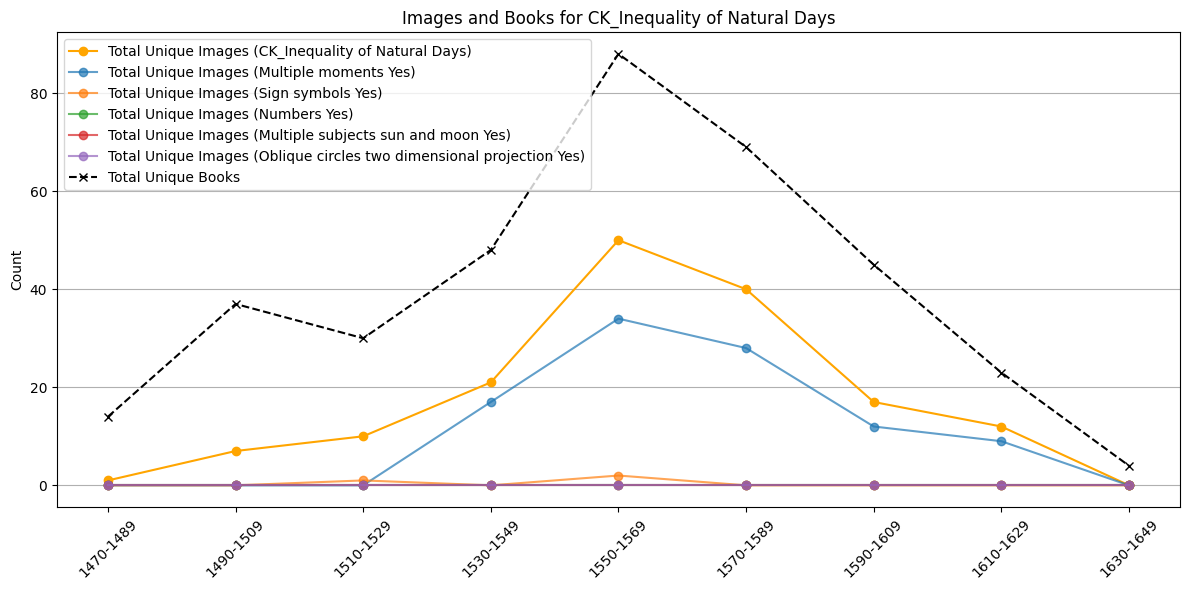

In [54]:

# Convert 'year' to int
sun_motion_visual['year'] = sun_motion_visual['year'].astype(int)
books['year'] = books['year'].astype(int)

# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals
sun_motion_visual['interval'] = pd.cut(sun_motion_visual['year'], bins=bins, labels=labels, right=False)
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Function to plot data for CK_Inequality of Natural Days
def plot_inequality_of_natural_days():
    keyword = 'CK_Inequality of Natural Days'
    filtered = sun_motion_visual[sun_motion_visual['cks'] == keyword]

    total_unique_images_per_interval = filtered.groupby('interval', observed=True)['images'].nunique().reindex(labels, fill_value=0)

    columns_to_check = [
        'multiple moments',
        'sign symbols',
        'numbers',
        'multiple subjects sun and moon',
        'oblique circles two dimensional projection'
    ]

    summary_data = pd.DataFrame({
        'Interval': labels,
        'Total Unique Images': total_unique_images_per_interval
    })

    for column in columns_to_check:
        total_unique_images_yes_per_interval = filtered[filtered[column] == 'yes'].groupby('interval', observed=True)['images'].nunique().reindex(labels, fill_value=0)
        summary_data[f'Total Unique Images ({column.capitalize()} Yes)'] = total_unique_images_yes_per_interval

    plt.figure(figsize=(12, 6))
    plt.plot(summary_data['Interval'], summary_data['Total Unique Images'], marker='o', linestyle='-', label=f'Total Unique Images ({keyword})', color='orange')

    for column in columns_to_check:
        plt.plot(summary_data['Interval'], summary_data[f'Total Unique Images ({column.capitalize()} Yes)'], marker='o', linestyle='-', label=f'Total Unique Images ({column.capitalize()} Yes)', alpha=0.7)

    total_unique_books_per_interval = books.groupby('interval', observed=True)['book'].nunique().reindex(labels, fill_value=0)
    summary_data['Total Unique Books'] = total_unique_books_per_interval

    plt.plot(summary_data['Interval'], summary_data['Total Unique Books'], marker='x', linestyle='--', color='black', label='Total Unique Books')

    plt.ylabel('Count')
    plt.title(f'Images and Books for {keyword}')
    plt.legend()
    plt.grid(axis='y')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Call the function for CK_Inequality of Natural Days
plot_inequality_of_natural_days()

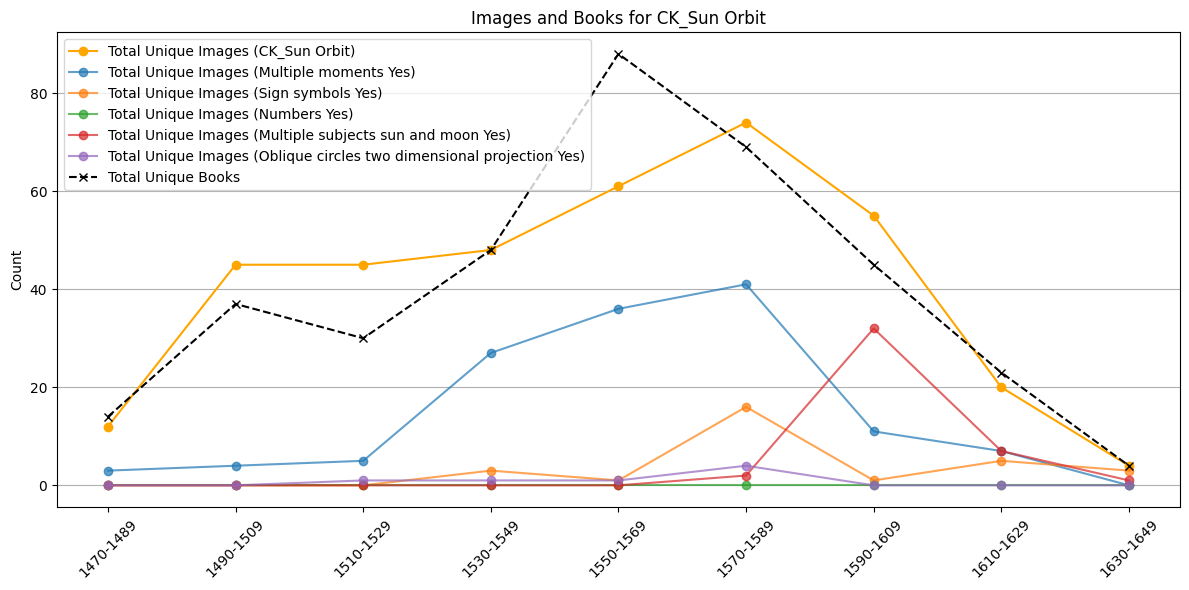

In [55]:
# Convert 'year' to int
sun_motion_visual['year'] = sun_motion_visual['year'].astype(int)
books['year'] = books['year'].astype(int)

# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals
sun_motion_visual['interval'] = pd.cut(sun_motion_visual['year'], bins=bins, labels=labels, right=False)
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Function to plot data for CK_Sun Orbit
def plot_sun_orbit():
    keyword = 'CK_Sun Orbit'
    filtered = sun_motion_visual[sun_motion_visual['cks'] == keyword]

    total_unique_images_per_interval = filtered.groupby('interval', observed=True)['images'].nunique().reindex(labels, fill_value=0)

    columns_to_check = [
        'multiple moments',
        'sign symbols',
        'numbers',
        'multiple subjects sun and moon',
        'oblique circles two dimensional projection'
    ]

    summary_data = pd.DataFrame({
        'Interval': labels,
        'Total Unique Images': total_unique_images_per_interval
    })

    for column in columns_to_check:
        total_unique_images_yes_per_interval = filtered[filtered[column] == 'yes'].groupby('interval', observed=True)['images'].nunique().reindex(labels, fill_value=0)
        summary_data[f'Total Unique Images ({column.capitalize()} Yes)'] = total_unique_images_yes_per_interval

    plt.figure(figsize=(12, 6))
    plt.plot(summary_data['Interval'], summary_data['Total Unique Images'], marker='o', linestyle='-', label=f'Total Unique Images ({keyword})', color='orange')

    for column in columns_to_check:
        plt.plot(summary_data['Interval'], summary_data[f'Total Unique Images ({column.capitalize()} Yes)'], marker='o', linestyle='-', label=f'Total Unique Images ({column.capitalize()} Yes)', alpha=0.7)

    total_unique_books_per_interval = books.groupby('interval', observed=True)['book'].nunique().reindex(labels, fill_value=0)
    summary_data['Total Unique Books'] = total_unique_books_per_interval

    plt.plot(summary_data['Interval'], summary_data['Total Unique Books'], marker='x', linestyle='--', color='black', label='Total Unique Books')

    plt.ylabel('Count')
    plt.title(f'Images and Books for {keyword}')
    plt.legend()
    plt.grid(axis='y')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Call the function for CK_Sun Orbit
plot_sun_orbit()

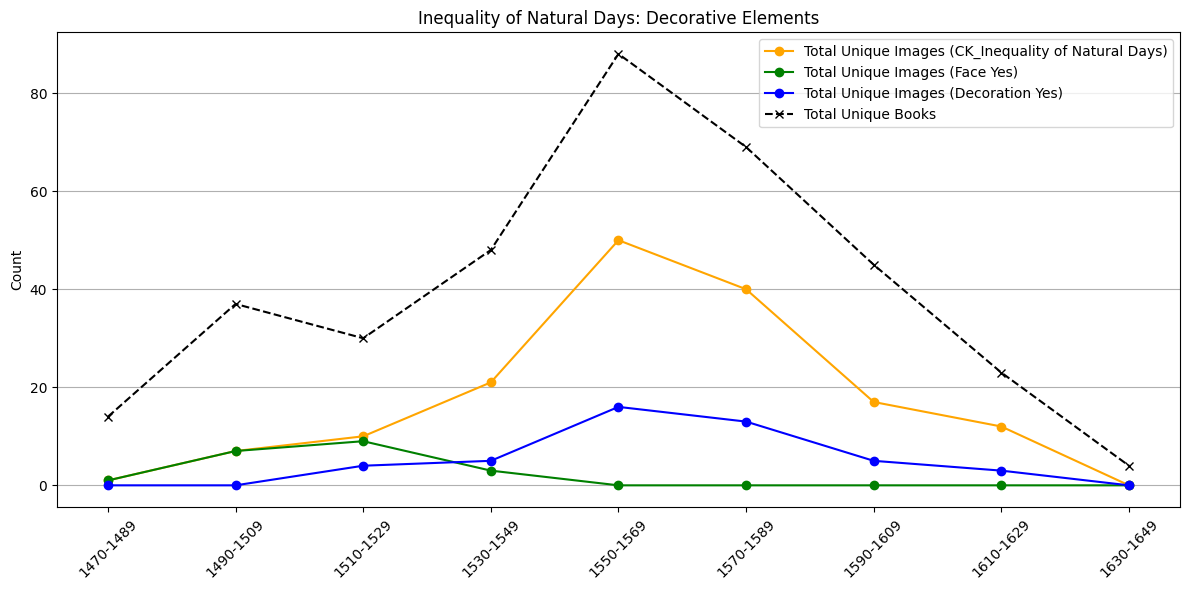

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrames (replace with your actual DataFrames)
# sun_motion_visual = pd.DataFrame(...)
# books = pd.DataFrame(...)

# Convert 'year' to int
sun_motion_visual['year'] = sun_motion_visual['year'].astype(int)
books['year'] = books['year'].astype(int)

# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals
sun_motion_visual['interval'] = pd.cut(sun_motion_visual['year'], bins=bins, labels=labels, right=False)
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Function to plot data for CK_Inequality of Natural Days
def plot_inequality_of_natural_days():
    keyword = 'CK_Inequality of Natural Days'
    filtered = sun_motion_visual[sun_motion_visual['cks'] == keyword]

    total_unique_images_per_interval = filtered.groupby('interval', observed=True)['images'].nunique().reindex(labels, fill_value=0)

    # Count total unique images with 'face' as 'yes' per interval
    total_unique_images_face_yes_per_interval = filtered[filtered['face'] == 'yes'].groupby('interval', observed=True)['images'].nunique().reindex(labels, fill_value=0)

    # Count total unique images with 'decoration' as 'yes' per interval
    total_unique_images_decoration_yes_per_interval = filtered[filtered['decoration'] == 'yes'].groupby('interval', observed=True)['images'].nunique().reindex(labels, fill_value=0)

    # Count total unique books per interval
    total_unique_books_per_interval = books.groupby('interval', observed=True)['book'].nunique().reindex(labels, fill_value=0)

    # Prepare data for plotting
    summary_data = pd.DataFrame({
        'Interval': labels,
        'Total Unique Images': total_unique_images_per_interval,
        'Total Unique Images (Face Yes)': total_unique_images_face_yes_per_interval,
        'Total Unique Images (Decoration Yes)': total_unique_images_decoration_yes_per_interval,
        'Total Unique Books': total_unique_books_per_interval
    })

    # Create a line graph
    plt.figure(figsize=(12, 6))
    plt.plot(summary_data['Interval'], summary_data['Total Unique Images'], marker='o', linestyle='-', label=f'Total Unique Images ({keyword})', color='orange')
    plt.plot(summary_data['Interval'], summary_data['Total Unique Images (Face Yes)'], marker='o', linestyle='-', label='Total Unique Images (Face Yes)', color='green')
    plt.plot(summary_data['Interval'], summary_data['Total Unique Images (Decoration Yes)'], marker='o', linestyle='-', label='Total Unique Images (Decoration Yes)', color='blue')
    plt.plot(summary_data['Interval'], summary_data['Total Unique Books'], marker='x', linestyle='--', color='black', label='Total Unique Books')  # Reference line

    # Formatting the plot
    plt.ylabel('Count')
    plt.title('Inequality of Natural Days: Decorative Elements')
    plt.legend()
    plt.grid(axis='y')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Call the function for CK_Inequality of Natural Days
plot_inequality_of_natural_days()
